<a href="https://colab.research.google.com/github/Jihwan98/Alpha/blob/main/Ateam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가설 1. 코로나 발생 이후 1인분 주문이 늘었을 것이다 (15000원 이하)
- 1인분 주문의 범위를 결제금액이 15000원 이하의 주문건으로 가정하였다.
- 코로나 발생 이후 외식이나 타인과 식사를 못하는 경우가 많아졌으므로 1인분 주문이 늘었을 것 이라고 생각하였다.

### delivery data
- GOODS_AMOUNT : 배달상품금액

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# to support retina display to remove blurring of korean character 
%config InlineBackend.figure_format = 'retina'
 
# install font 
!apt -qq -y install fonts-nanum
 
# set the installed font as default
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
dlvy = pd.read_csv('/content/drive/MyDrive/KT_data_20200717/delivery.csv')

In [ ]:
# 6월 데이터 부족으로 6월 데이터 삭제하기
np.where(dlvy.PROCESS_DT == '2020-06-01')

(array([4681952, 4681953, 4681954, ..., 4708900, 4708901, 4708902]),)

In [ ]:
dlvy = dlvy[:4681951]

In [ ]:
# 시계열 데이터로 바꿔주기
dlvy['date'] = pd.to_datetime(dlvy['PROCESS_DT'])

In [ ]:
# column 명 바꿔주기
dlvy.rename(columns={'GOODS_AMOUNT':'결제금액'}, inplace=True)

In [ ]:
# 결제금액 15000원 이하 추출
alone = dlvy[dlvy['결제금액'] <= 15000].reset_index(drop=True)

In [ ]:
alone_size = pd.DataFrame(alone.groupby('date').size(), columns = ['size'])
alone_size_week = alone_size.resample('W').sum()
alone_size_month = alone_size.resample('M').sum()

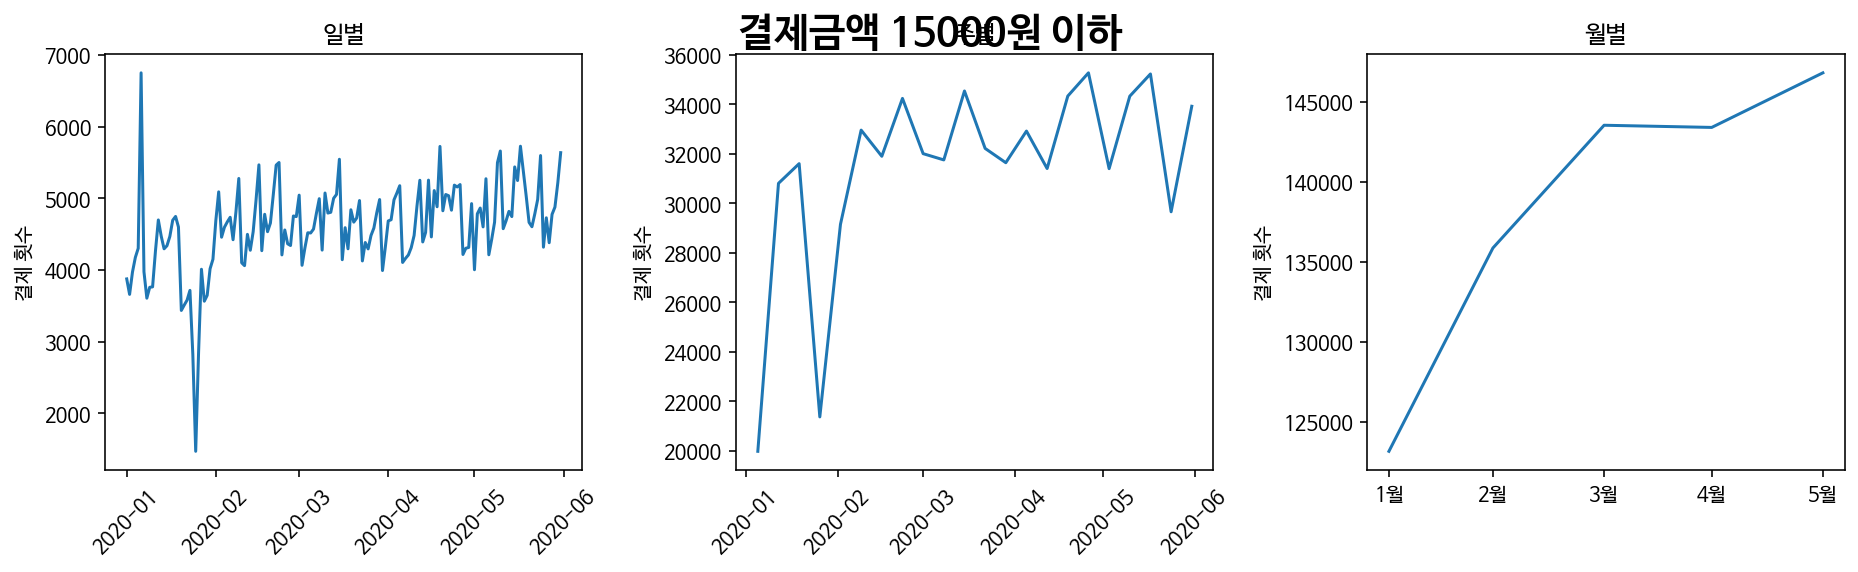

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(alone_size)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(alone_size_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(alone_size_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(alone_size_month.index,values)

plt.suptitle('결제금액 15000원 이하',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
not_alone = dlvy[dlvy['결제금액'] > 15000].reset_index(drop=True)

not_alone_size = pd.DataFrame(not_alone.groupby('date').size(), columns = ['size'])
not_alone_size_week = not_alone_size.resample('W').sum()
not_alone_size_month = not_alone_size.resample('M').sum()

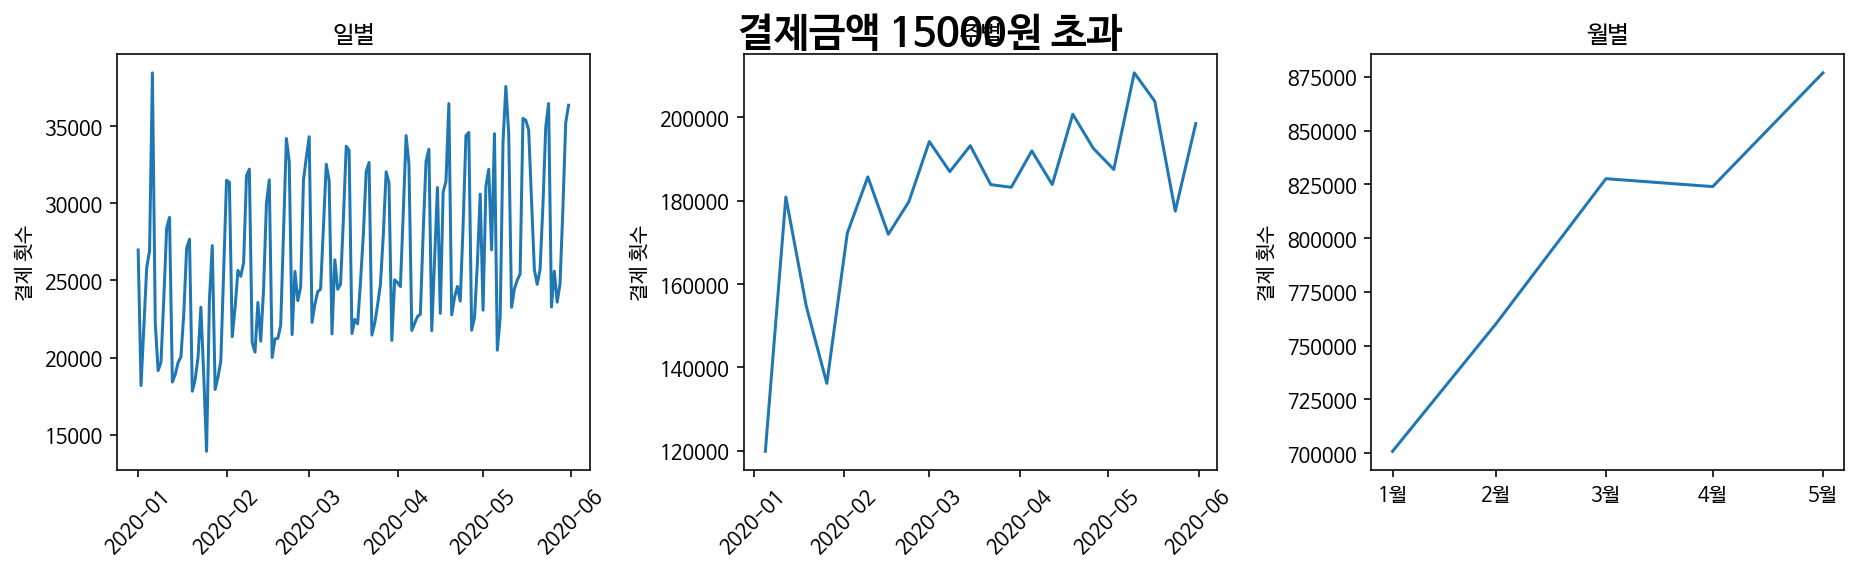

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(not_alone_size)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(not_alone_size_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(not_alone_size_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.suptitle('결제금액 15000원 초과',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
many = dlvy[dlvy['결제금액'] >= 50000].reset_index(drop=True)

many = pd.DataFrame(many.groupby('date').size(), columns = ['size'])
many_week = many.resample('W').sum()
many_month = many.resample('M').sum()

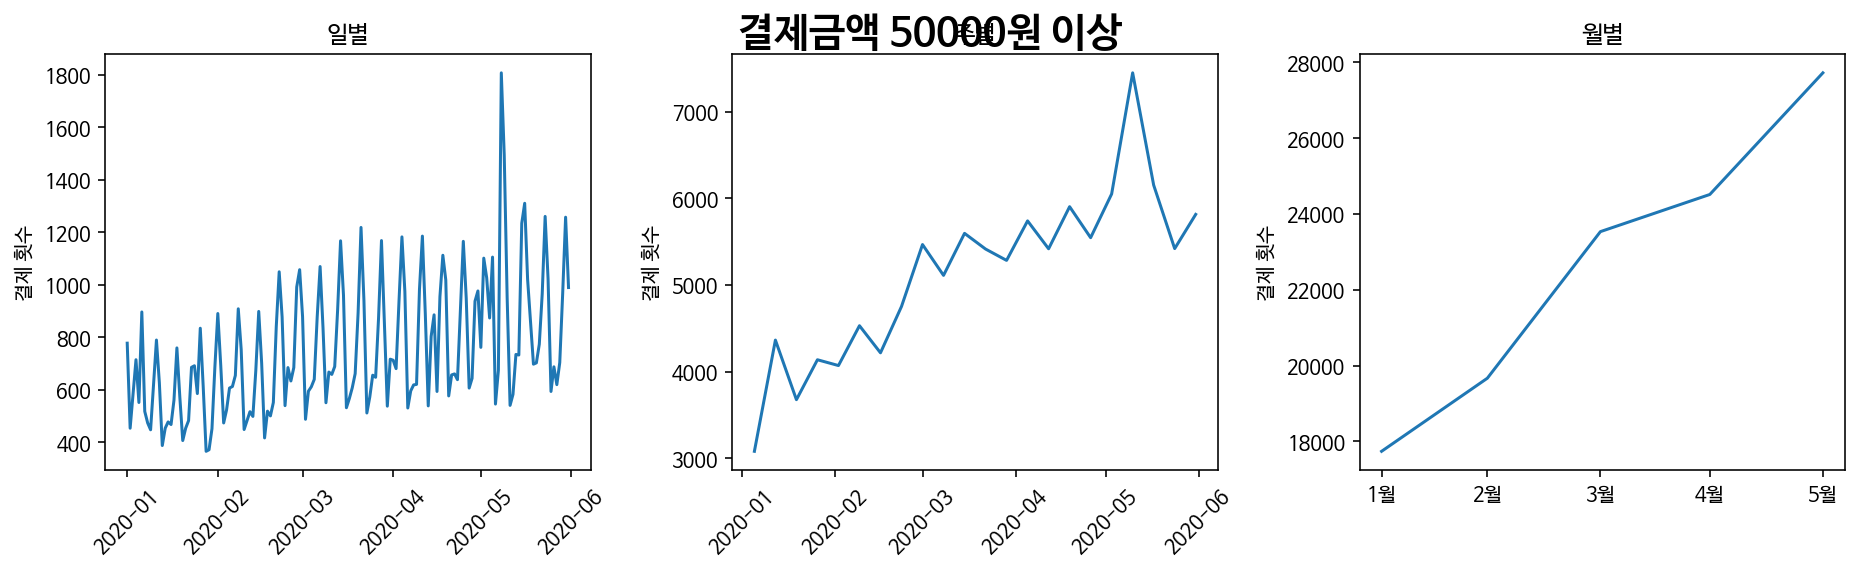

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(many)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(many_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(many_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.suptitle('결제금액 50000원 이상',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

In [ ]:
total = pd.DataFrame(dlvy.groupby('date').size(), columns = ['size'])
total_week = total.resample('W').sum()
total_month = total.resample('M').sum()

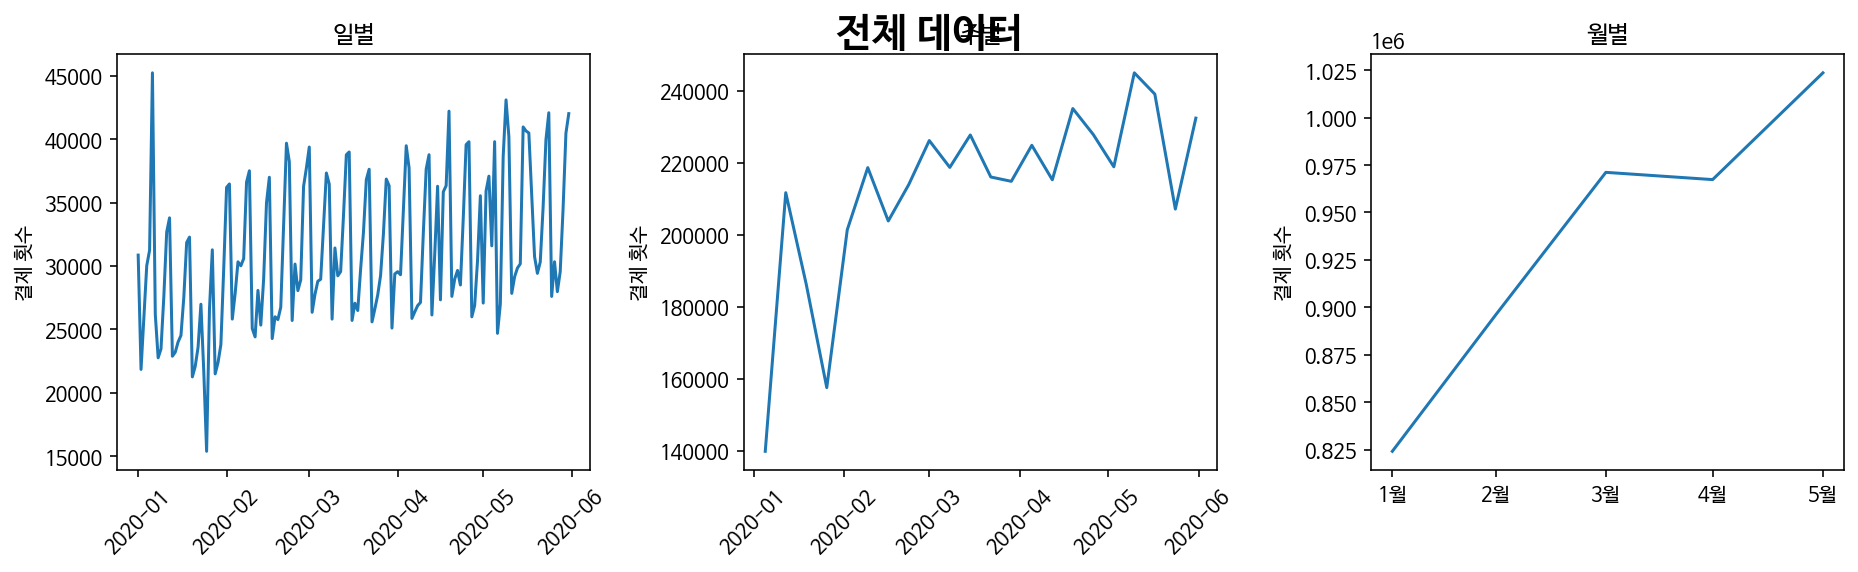

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(total)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(total_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(total_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(total_month.index,values)

plt.suptitle('전체 데이터',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

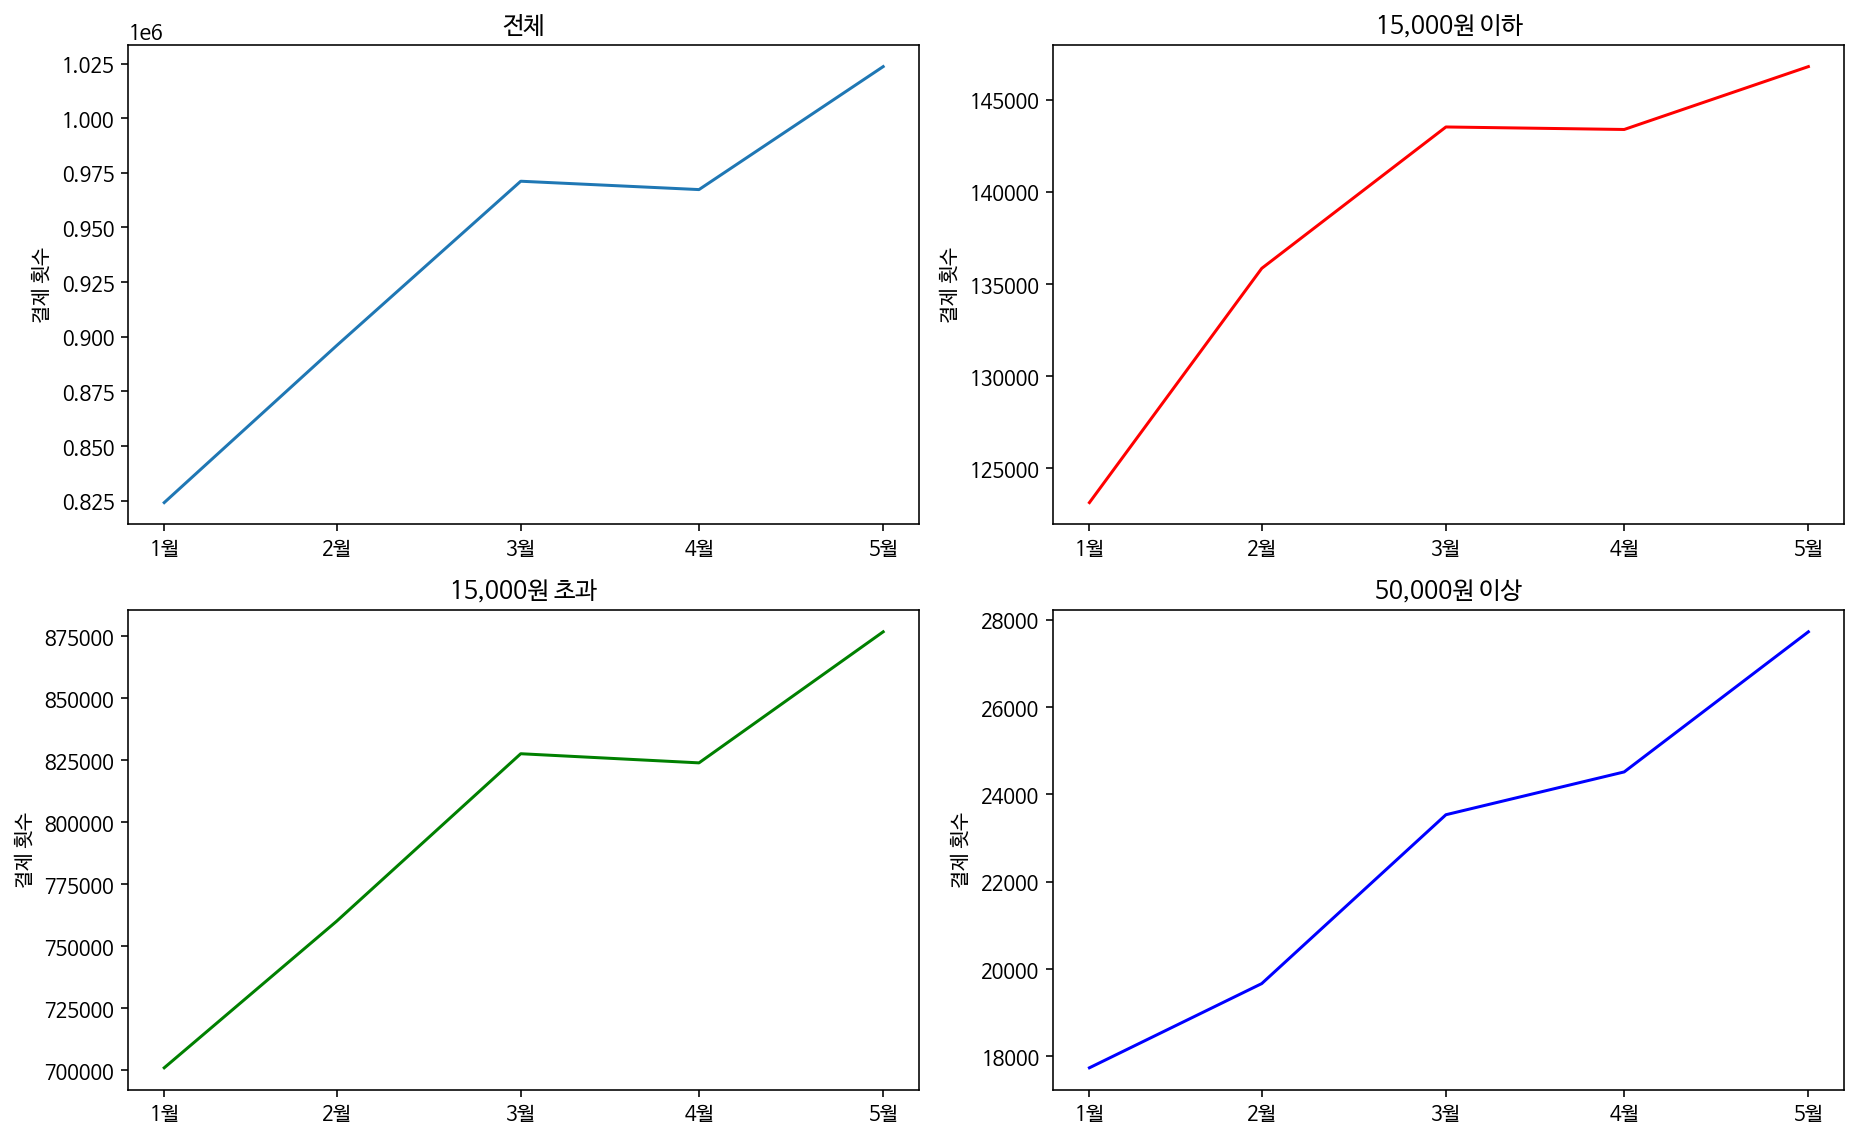

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(total_month)
plt.title('전체')
plt.ylabel('결제 횟수')
plt.xticks(total_month.index,values)

plt.subplot(2,2,2)
plt.plot(alone_size_month, c='r')
plt.title('15,000원 이하')
plt.ylabel('결제 횟수')
plt.xticks(alone_size_month.index,values)

plt.subplot(2,2,3)
plt.plot(not_alone_size_month, c='g')
plt.title('15,000원 초과')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.subplot(2,2,4)
plt.plot(many_month, c='b')
plt.title('50,000원 이상')
plt.ylabel('결제 횟수')
plt.xticks(not_alone_size_month.index,values)

plt.tight_layout()
plt.show()

- 전체적으로 모두 증가추세를 보였다.
- 50,000원 이상의 주문 건수가 뚜렷한 증가추세를 보여준다.

## 주문 건수의 증가를 확인하기에는 전체 주문건수에서 15,000원 이하의 데이터가 차지하는 비율을 확인 해보는 것이 좋을 것이라고 생각했다.

In [ ]:
rate = alone_size / total * 100

In [ ]:
rate_month = alone_size_month / total_month * 100

In [ ]:
rate_week = alone_size_week / total_week * 100

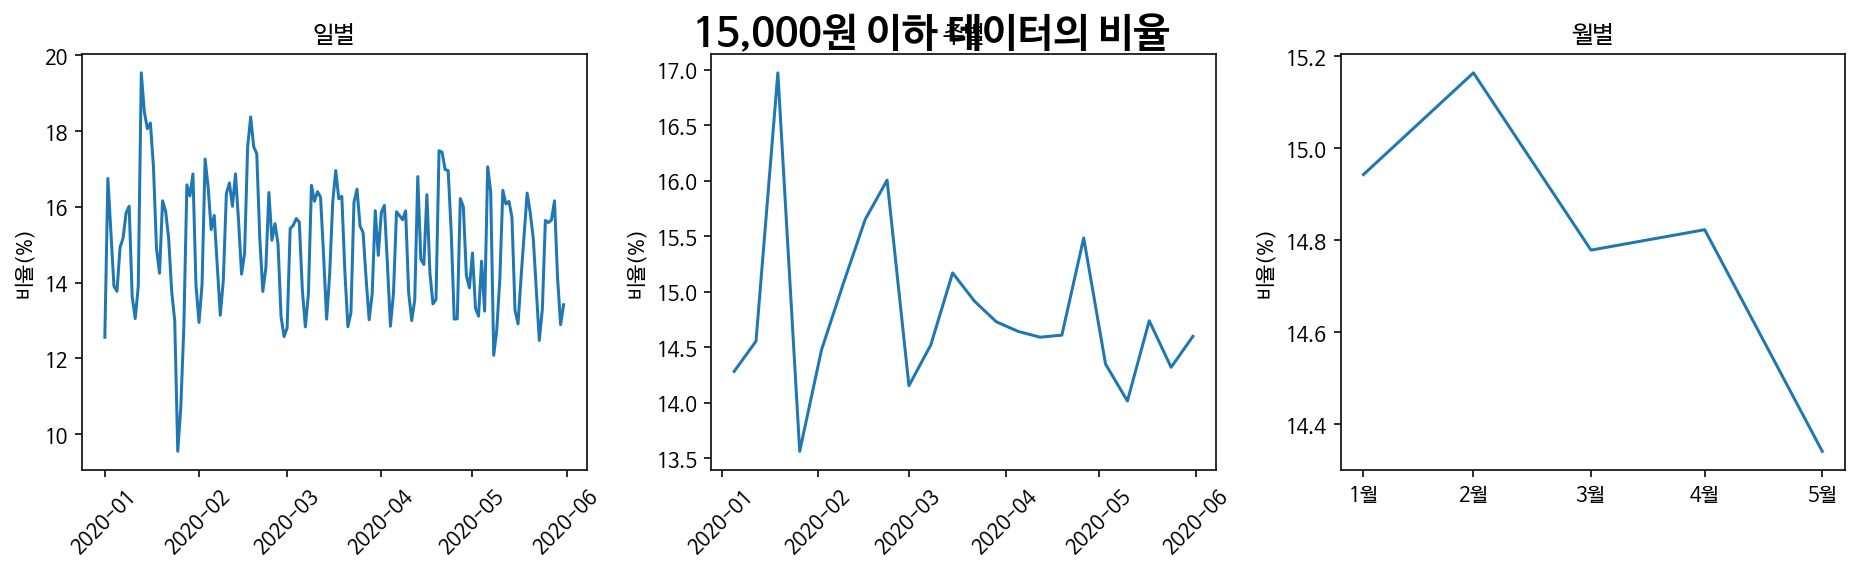

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,4) 

plt.subplot(1, 3, 1)                
plt.plot(rate)
plt.title('일별')
plt.ylabel('비율(%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)                
plt.plot(rate_week)
plt.title('주별')
plt.ylabel('비율(%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)                
plt.plot(rate_month)
plt.title('월별')
plt.ylabel('비율(%)')
plt.xticks(total_month.index,values)

plt.suptitle('15,000원 이하 데이터의 비율',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

- 비율로 확인해 보았을 때, 오히려 15,000원 이하의 주문 건은 줄어든 것으로 확인되었다.

## 정리
- 코로나 이후 배달 주문의 양이 늘었을 것이다. 그 중 타인과의 식사가 많이 줄어들었을 것이고 따라서 1인분의 양으로 시켜먹는 건수가 많아졌을 것이라고 생각하였다.
- 15,000원 이하의 데이터만 뽑아보았을 때는 전체 데이터와 마찬가지로 증가하는 추세를 보였다. 하지만 오히려 뚜렷한 증가추세를 보인 것은 50,000원 이상의 데이터였다.
- 비율로 확인해 보았을 때는 15,000원 이하의 주문 건은 줄어들었다.
- 코로나 이후 1인분의 주문건수는 늘어났지만, 전체 비율에서는 오히려 줄어들었다.
- 코로나 이후 외식이 줄어들고 가족단위로 주문을 시키는 양이 늘었다고 생각해 볼 수 있었다.
___

# 가설 2. 코로나 발생 이후 국내 골프산업이 성장할 것이다
- 해외 출국 금지로 인해 국내 골프장의 수요가 증가할 것이다.
- 마스크의 착용 유무가 운동에 미치는 영향이 미미하기 때문에 마스크의 영향을 많이 받는 다른 운동을 하기 보다 골프를 더 많이 할 것이다.

In [ ]:
card = pd.read_csv('/content/drive/MyDrive/KT_data_20200717/card_20200717.csv')

In [ ]:
card['date'] = pd.to_datetime(card['receipt_dttm'].astype(str))
del card['receipt_dttm']
card.rename(columns={'mrhst_induty_cl_nm':'항목','selng_cascnt' : '건수', 'salamt' : '금액', 'mrhst_induty_cl_code' : '업종코드'}, inplace=True)

In [ ]:
# 데이터기 적은 6월 데이터 삭제하기
np.where(card.date == '2020-06-01')

(array([3333538, 3333539, 3333540, ..., 3353973, 3353974, 3353975]),)

In [ ]:
card = card[:3333538]

In [ ]:
# 건수의 음수 값 삭제
card = card.drop(np.where(card['건수'] < 0)[0].tolist(),0).reset_index(drop=True)

In [ ]:
code2 = card[card['업종코드']//1000 == 2]

In [ ]:
code2['항목'].unique()  # 골프경기장, 골프연습장, 스크린골프, 골프 용품

array(['기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품', '화   원', '애완 동물', '영화관',
       '스크린골프', '골프연습장', '골프 용품', '민예공예품', '악 기 점', '화방표구점', '수 족 관',
       '티켓', '화   랑', '문화취미기타', '테니스 장', '볼 링 장', '수 영 장', '종합레져타운',
       '골프경기장', '카지노', '스 키 장', '골동품 점', '피아노대리점', '총포류판매'], dtype=object)

In [ ]:
golf_count = code2.groupby(['date','항목'])['건수'].sum().unstack()[['골프경기장','골프연습장','스크린골프','골프 용품']].fillna(0)
golf_money = code2.groupby(['date','항목'])['금액'].sum().unstack()[['골프경기장','골프연습장','스크린골프','골프 용품']].fillna(0)

In [ ]:
golf_count_week = golf_count.resample('W').sum()
golf_money_week = golf_money.resample('W').sum()

In [ ]:
golf_count_month = golf_count.resample('M').sum()
golf_money_month = golf_money.resample('M').sum()

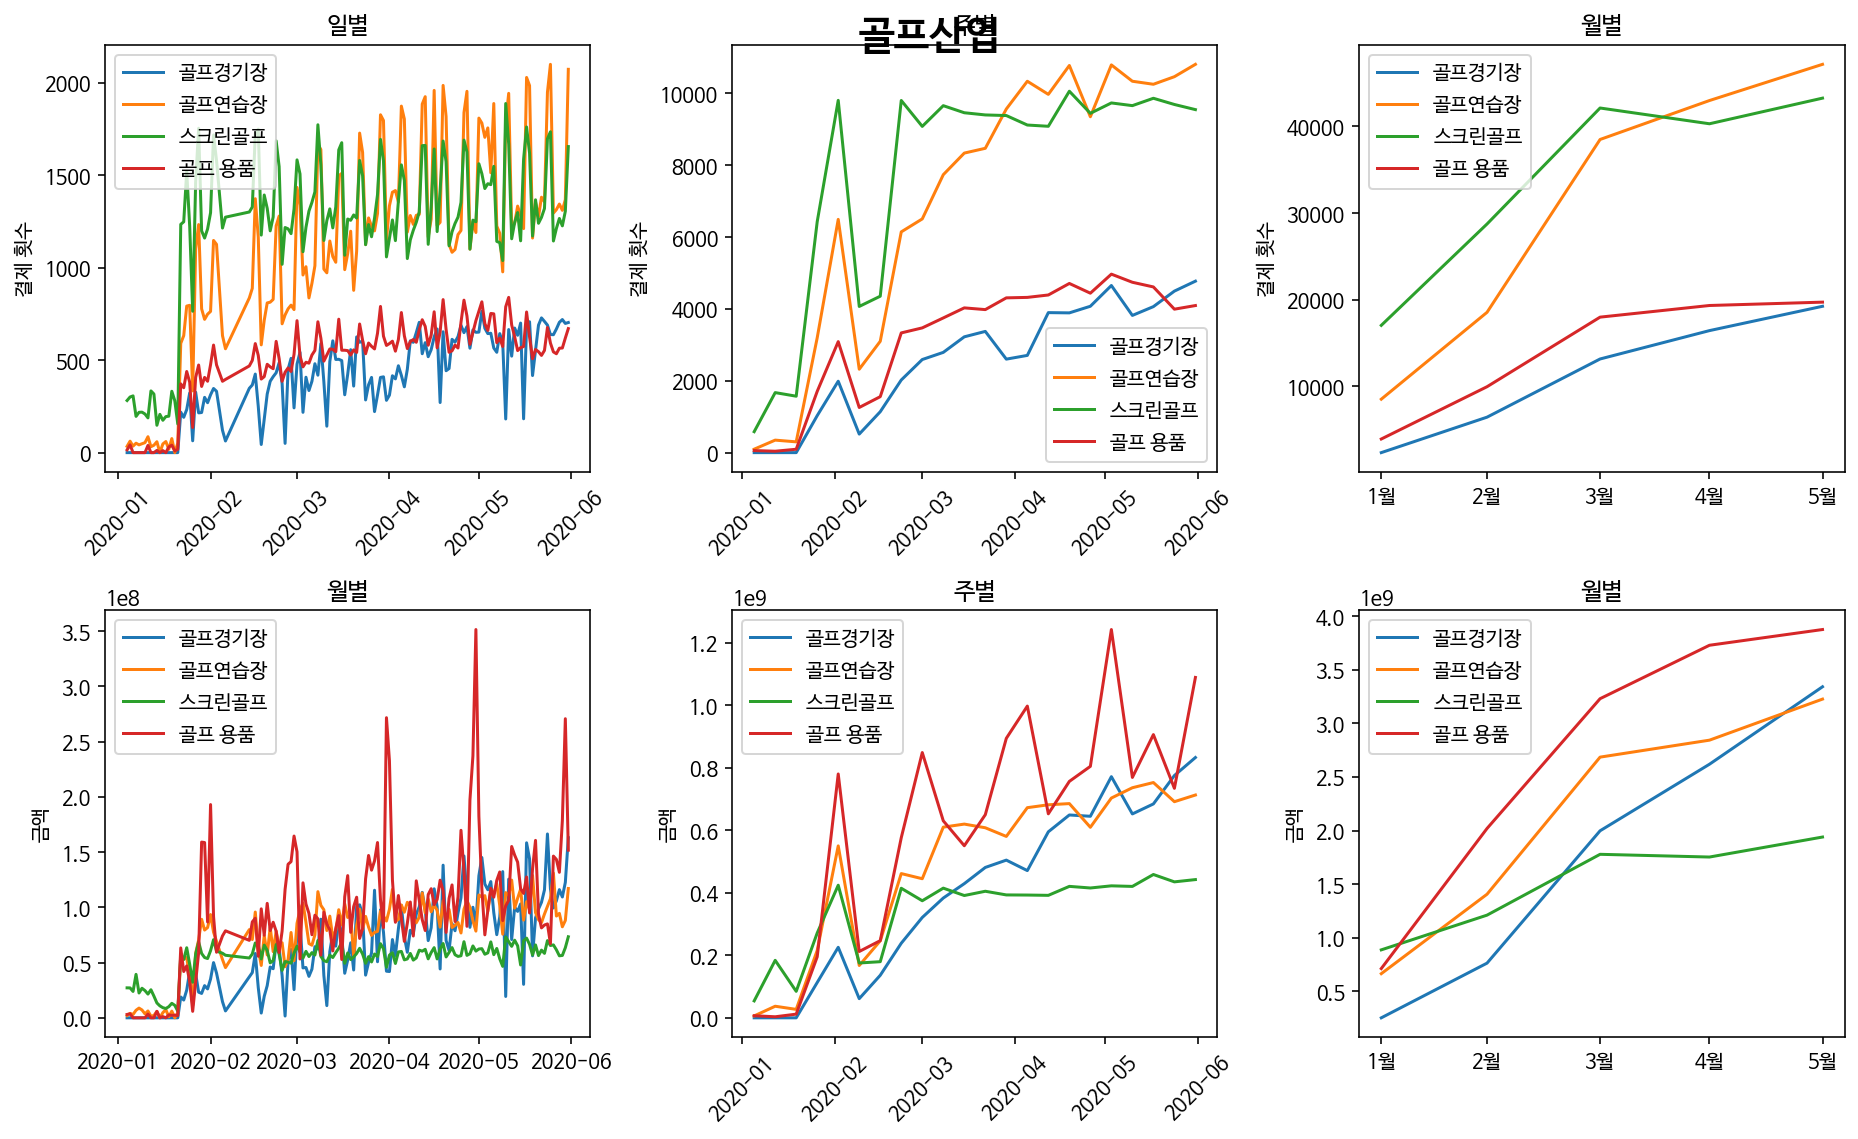

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8) 

plt.subplot(2, 3, 1)                
plt.plot(golf_count)
plt.title('일별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)
plt.legend(golf_count.columns)

plt.subplot(2, 3, 2)                
plt.plot(golf_count_week)
plt.title('주별')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)
plt.legend(golf_count_week.columns)

plt.subplot(2, 3, 3)                
plt.plot(golf_count_month)
plt.title('월별')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)
plt.legend(golf_count_month.columns)

plt.subplot(2, 3, 4)                
plt.plot(golf_money)
plt.title('월별')
plt.ylabel('금액')
plt.legend(golf_money.columns)

plt.subplot(2, 3, 5)                
plt.plot(golf_money_week)
plt.title('주별')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend(golf_money_week.columns)

plt.subplot(2, 3, 6)                
plt.plot(golf_money_month)
plt.title('월별')
plt.ylabel('금액')
plt.xticks(golf_money_month.index,values)
plt.legend(golf_money_month.columns)

plt.suptitle('골프산업',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

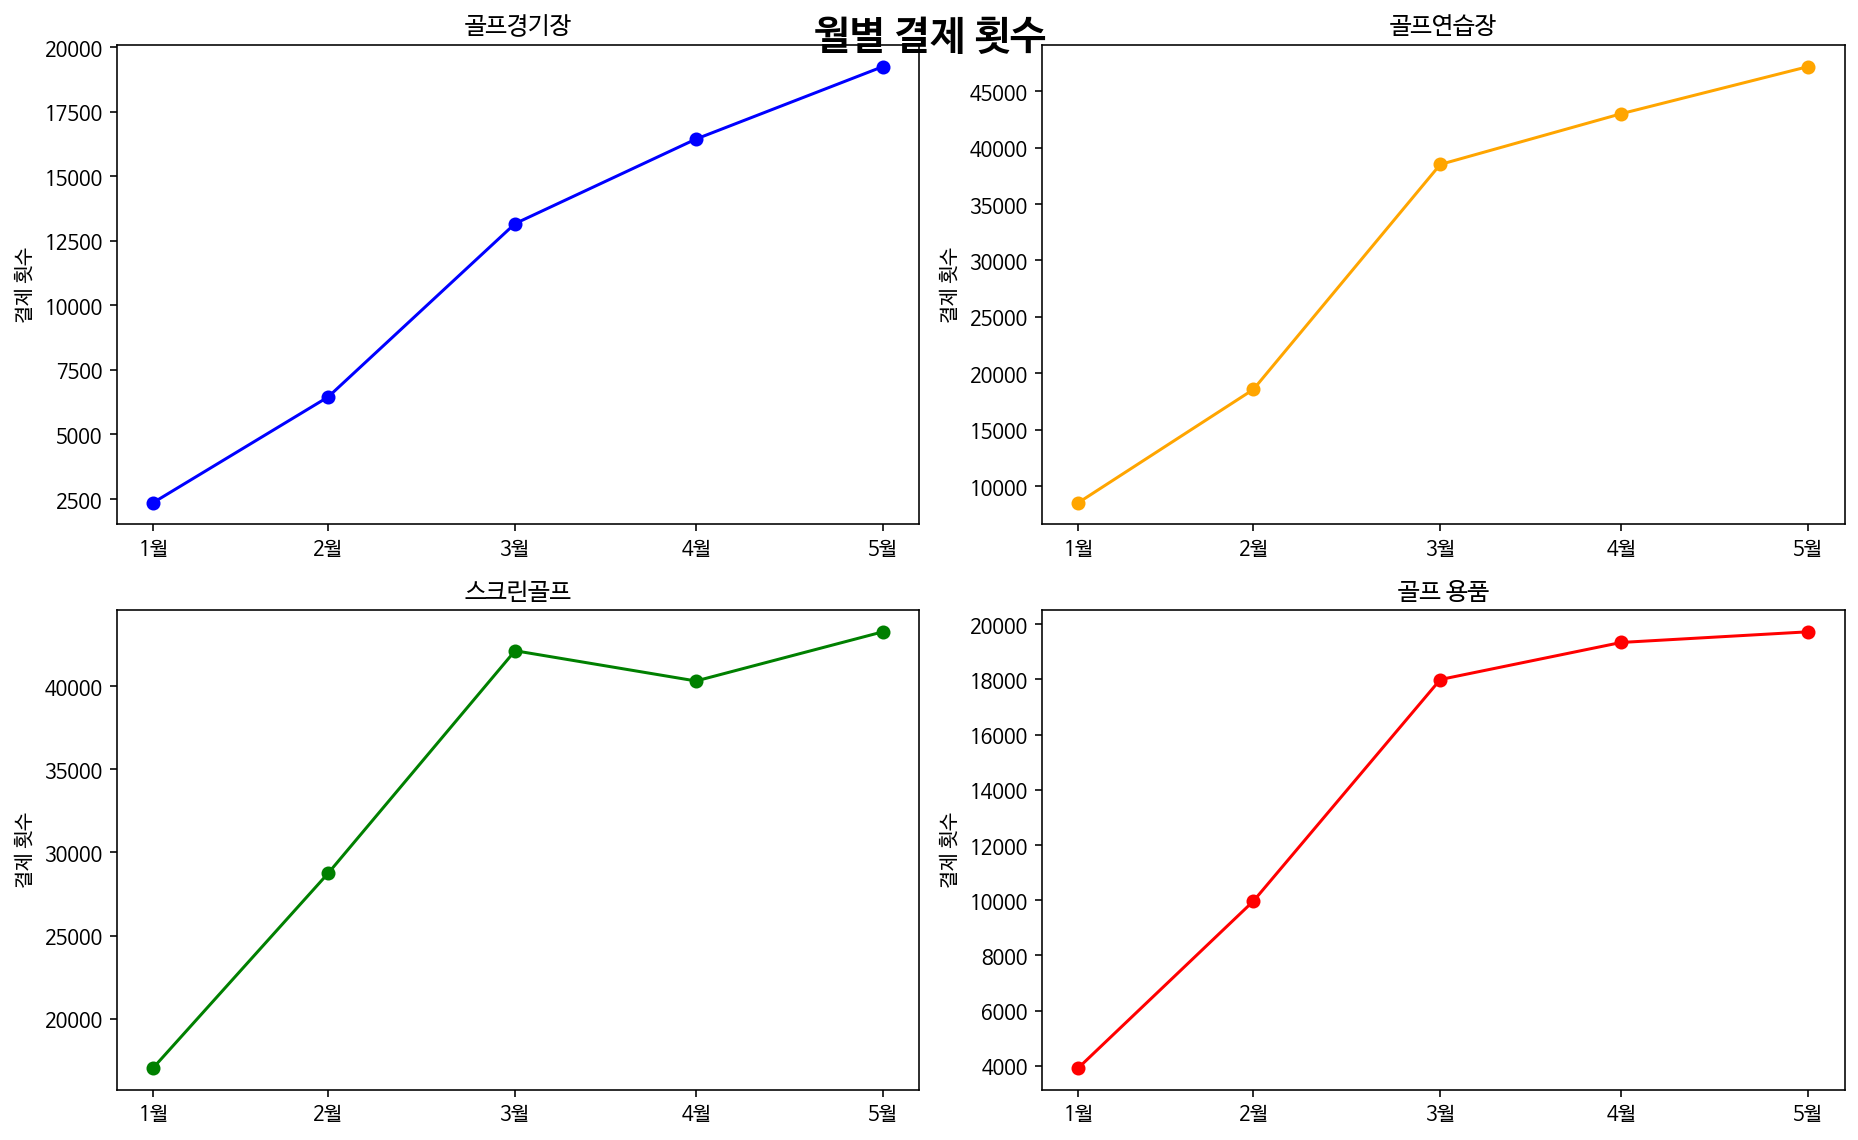

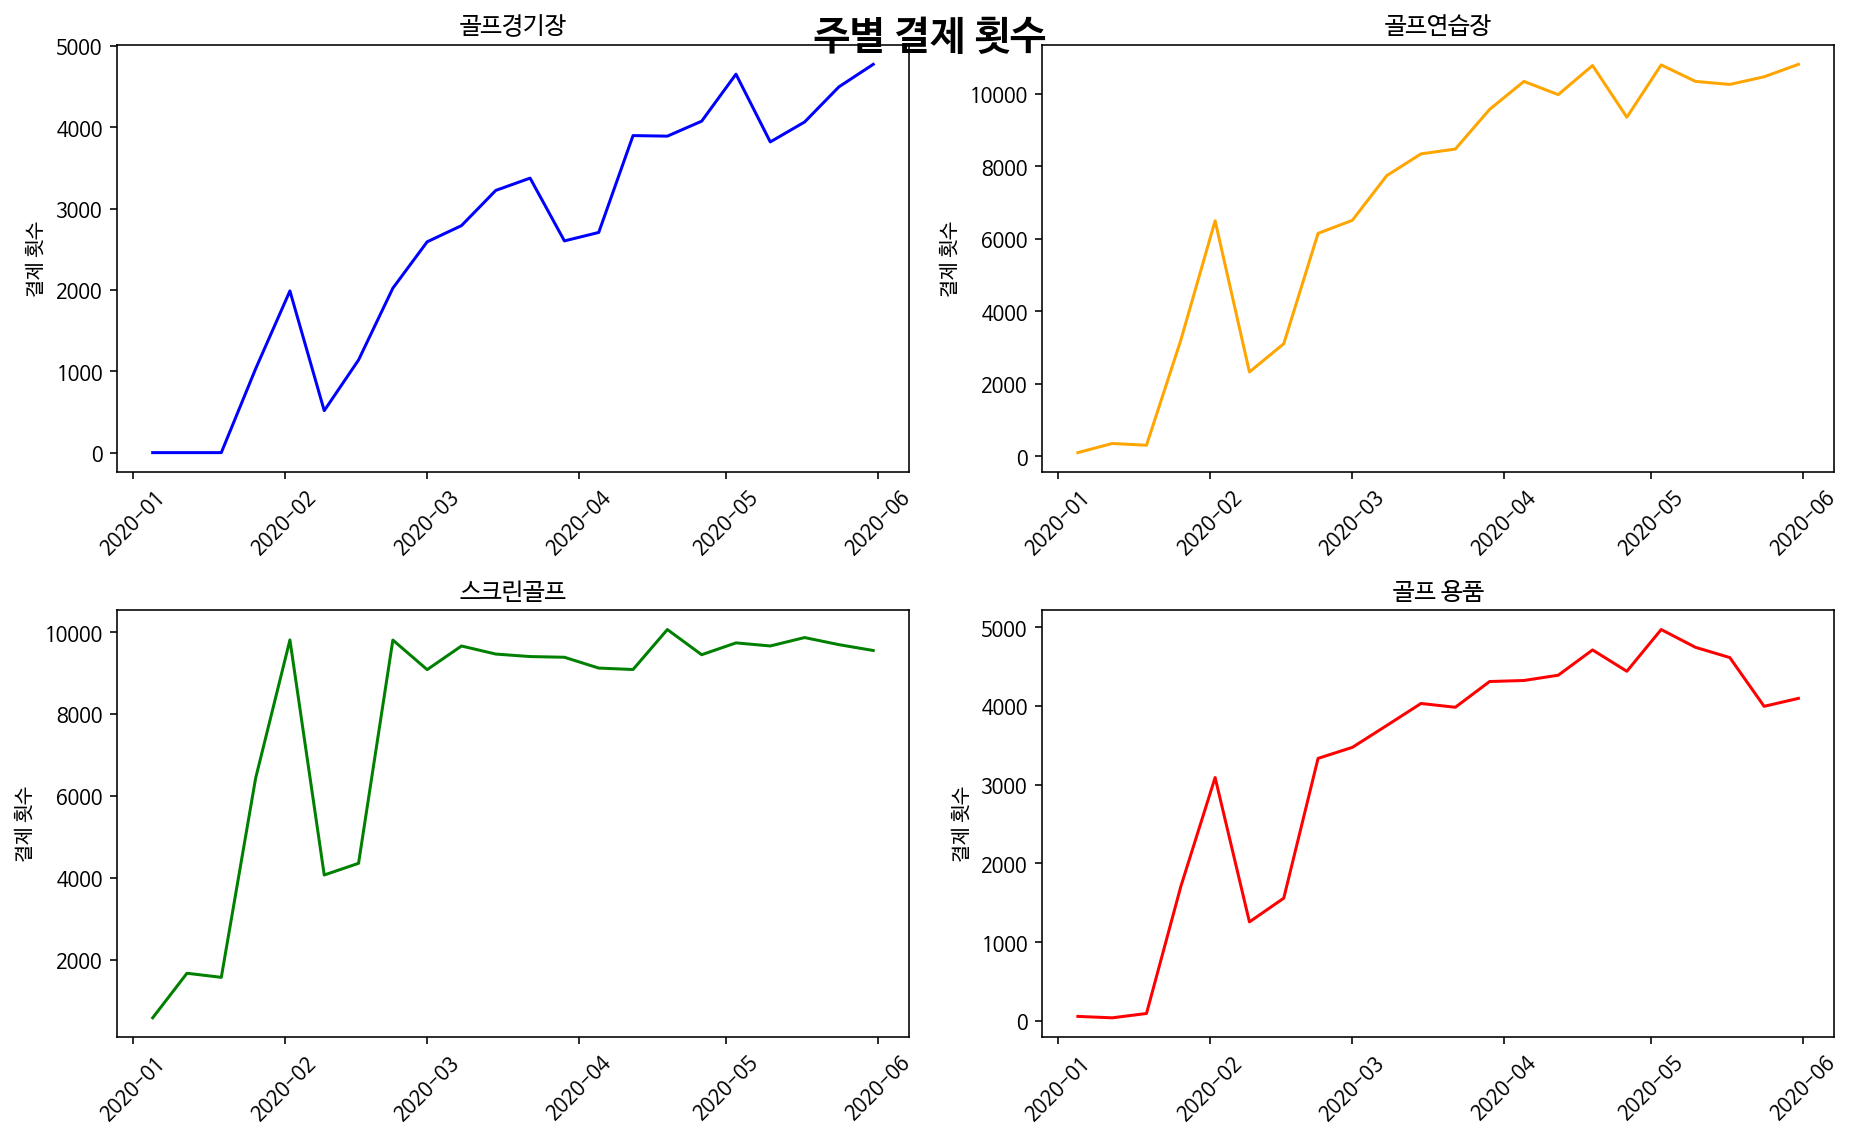

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_count_month['골프경기장'], c='b', marker = "o")
plt.title('골프경기장')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,2)
plt.plot(golf_count_month['골프연습장'], c='orange', marker = "o")
plt.title('골프연습장')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,3)
plt.plot(golf_count_month['스크린골프'], c='g', marker = "o")
plt.title('스크린골프')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.subplot(2,2,4)
plt.plot(golf_count_month['골프 용품'], c='r', marker = "o")
plt.title('골프 용품')
plt.ylabel('결제 횟수')
plt.xticks(golf_count_month.index,values)

plt.suptitle('월별 결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

#########
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_count_week['골프경기장'], c='b')
plt.title('골프경기장')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(golf_count_week['골프연습장'], c='orange')
plt.title('골프연습장')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(golf_count_week['스크린골프'], c='g')
plt.title('스크린골프')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(golf_count_week['골프 용품'], c='r')
plt.title('골프 용품')
plt.ylabel('결제 횟수')
plt.xticks(rotation=45)

plt.suptitle('주별 결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

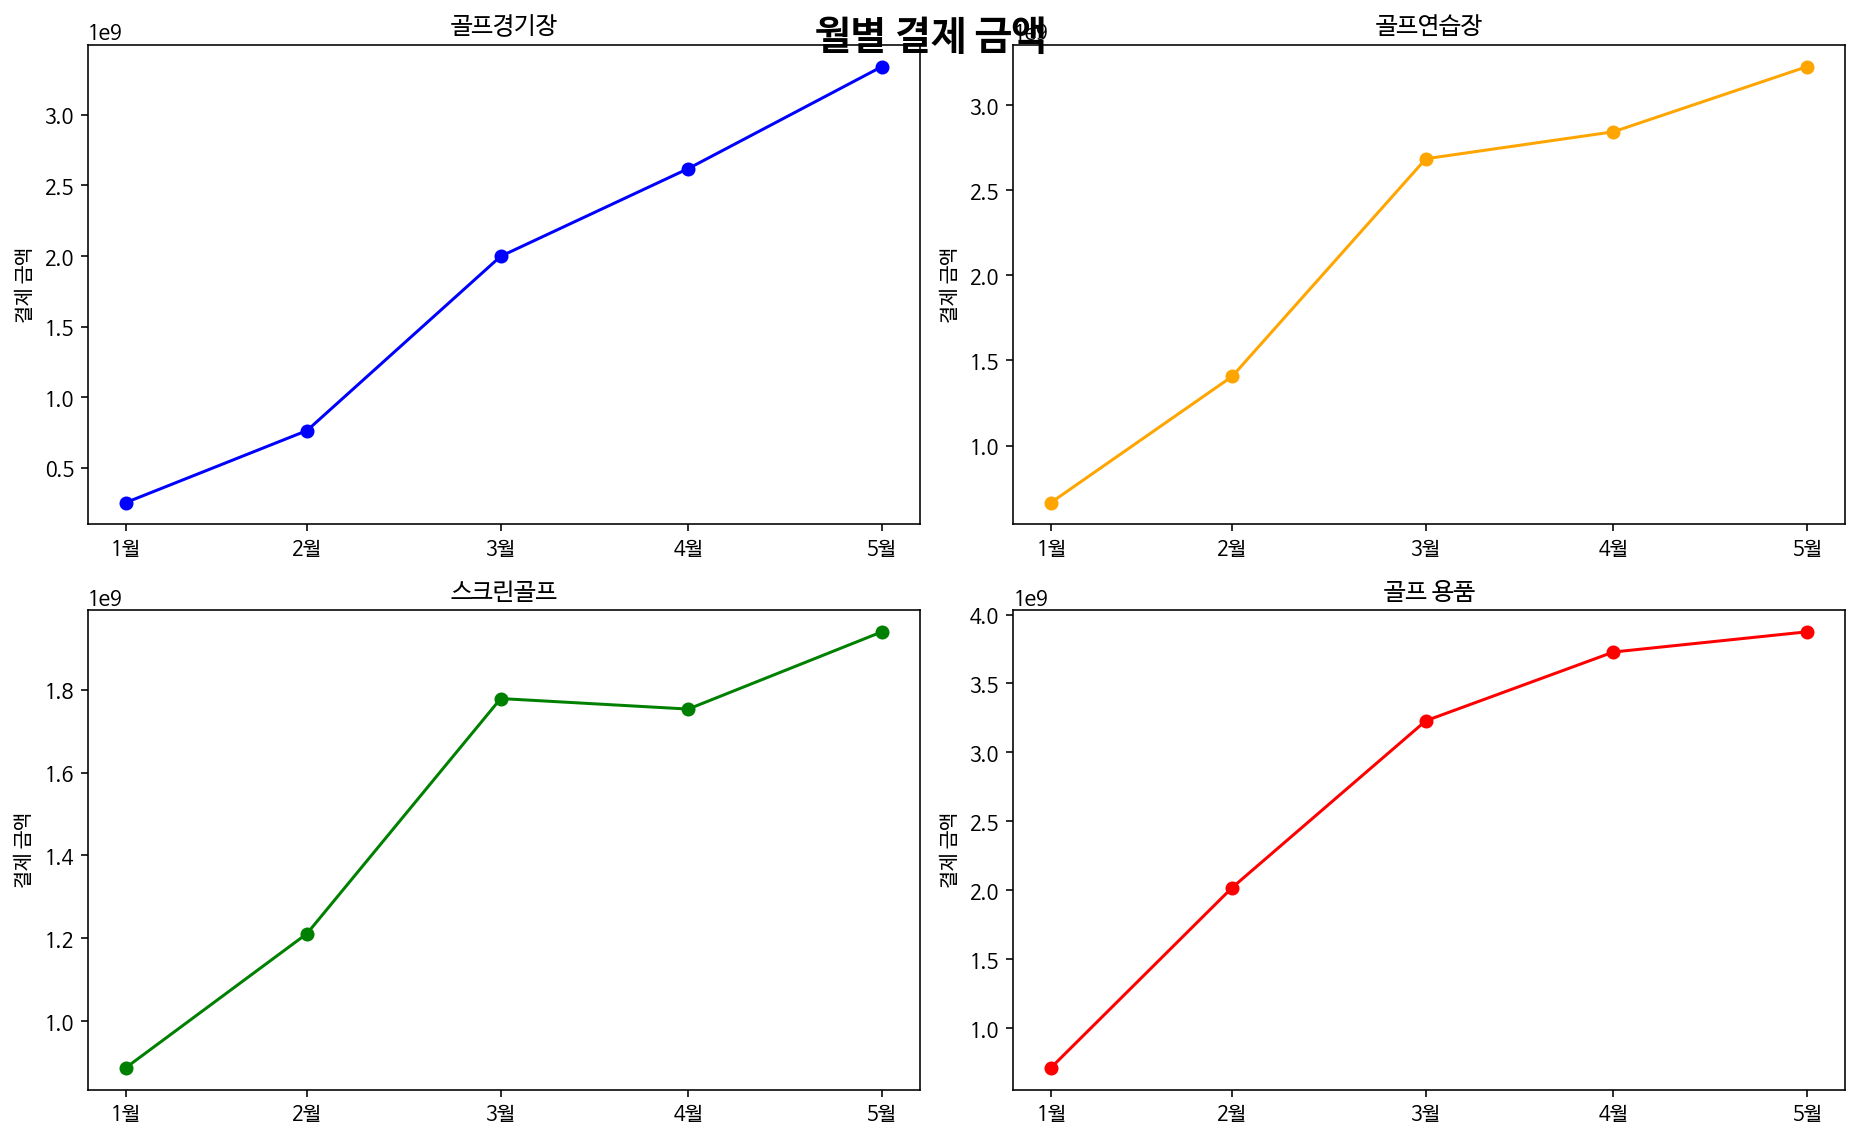

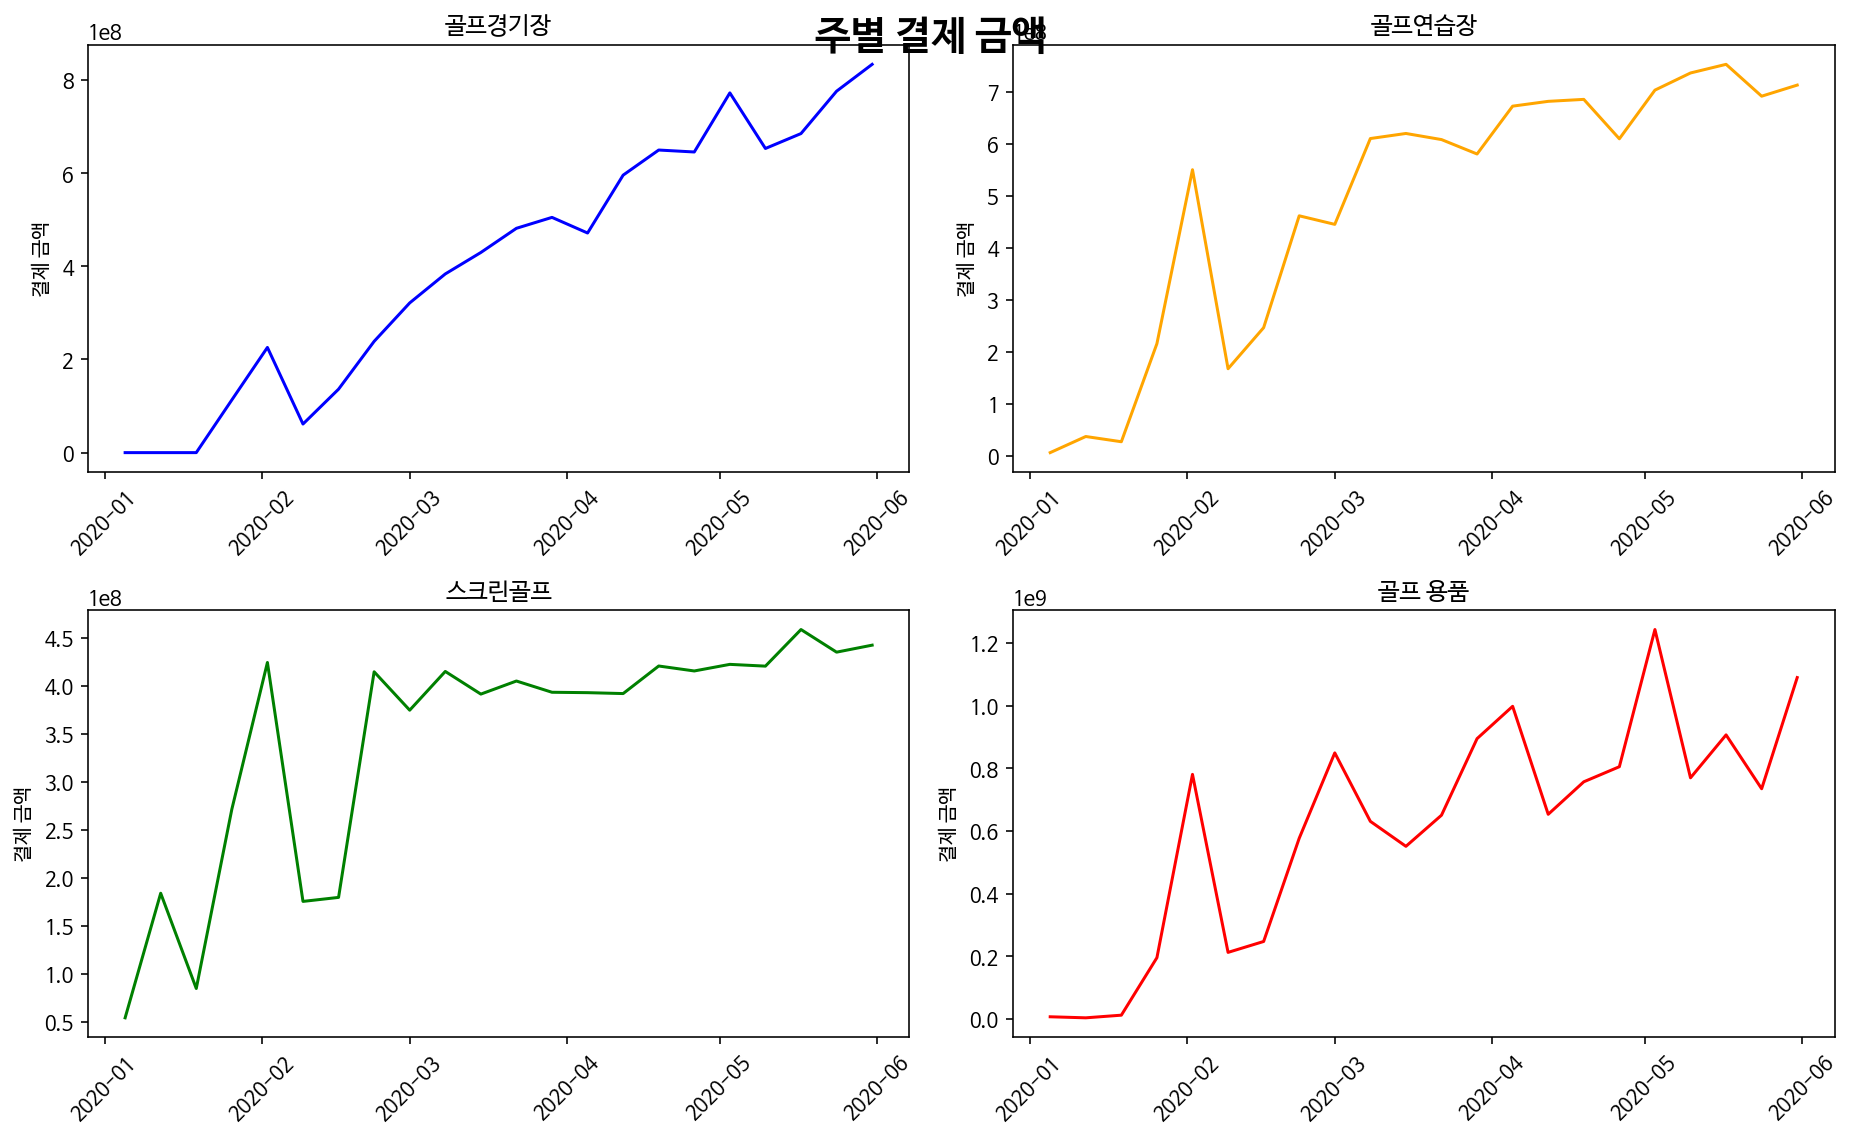

In [ ]:
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_money_month['골프경기장'], c='b', marker = "o")
plt.title('골프경기장')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,2)
plt.plot(golf_money_month['골프연습장'], c='orange', marker = "o")
plt.title('골프연습장')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,3)
plt.plot(golf_money_month['스크린골프'], c='g', marker = "o")
plt.title('스크린골프')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.subplot(2,2,4)
plt.plot(golf_money_month['골프 용품'], c='r', marker = "o")
plt.title('골프 용품')
plt.ylabel('결제 금액')
plt.xticks(golf_money_month.index,values)

plt.suptitle('월별 결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

############
fig = plt.figure()
fig.set_size_inches(13,8)

plt.subplot(2,2,1)
plt.plot(golf_money_week['골프경기장'], c='b')
plt.title('골프경기장')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(golf_money_week['골프연습장'], c='orange')
plt.title('골프연습장')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(golf_money_week['스크린골프'], c='g')
plt.title('스크린골프')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(golf_money_week['골프 용품'], c='r')
plt.title('골프 용품')
plt.ylabel('결제 금액')
plt.xticks(rotation=45)

plt.suptitle('주별 결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

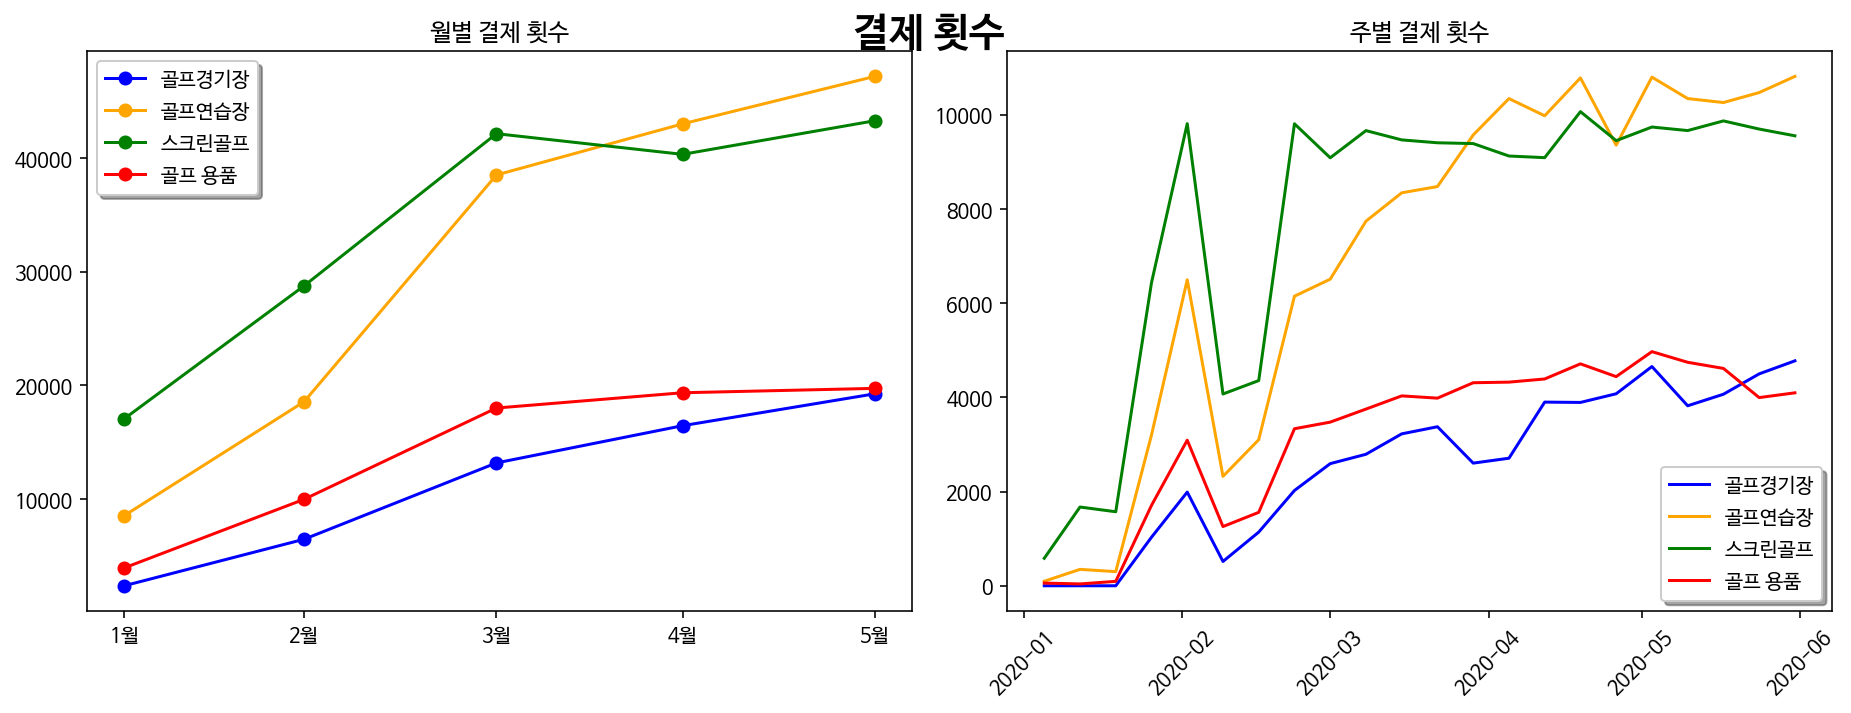

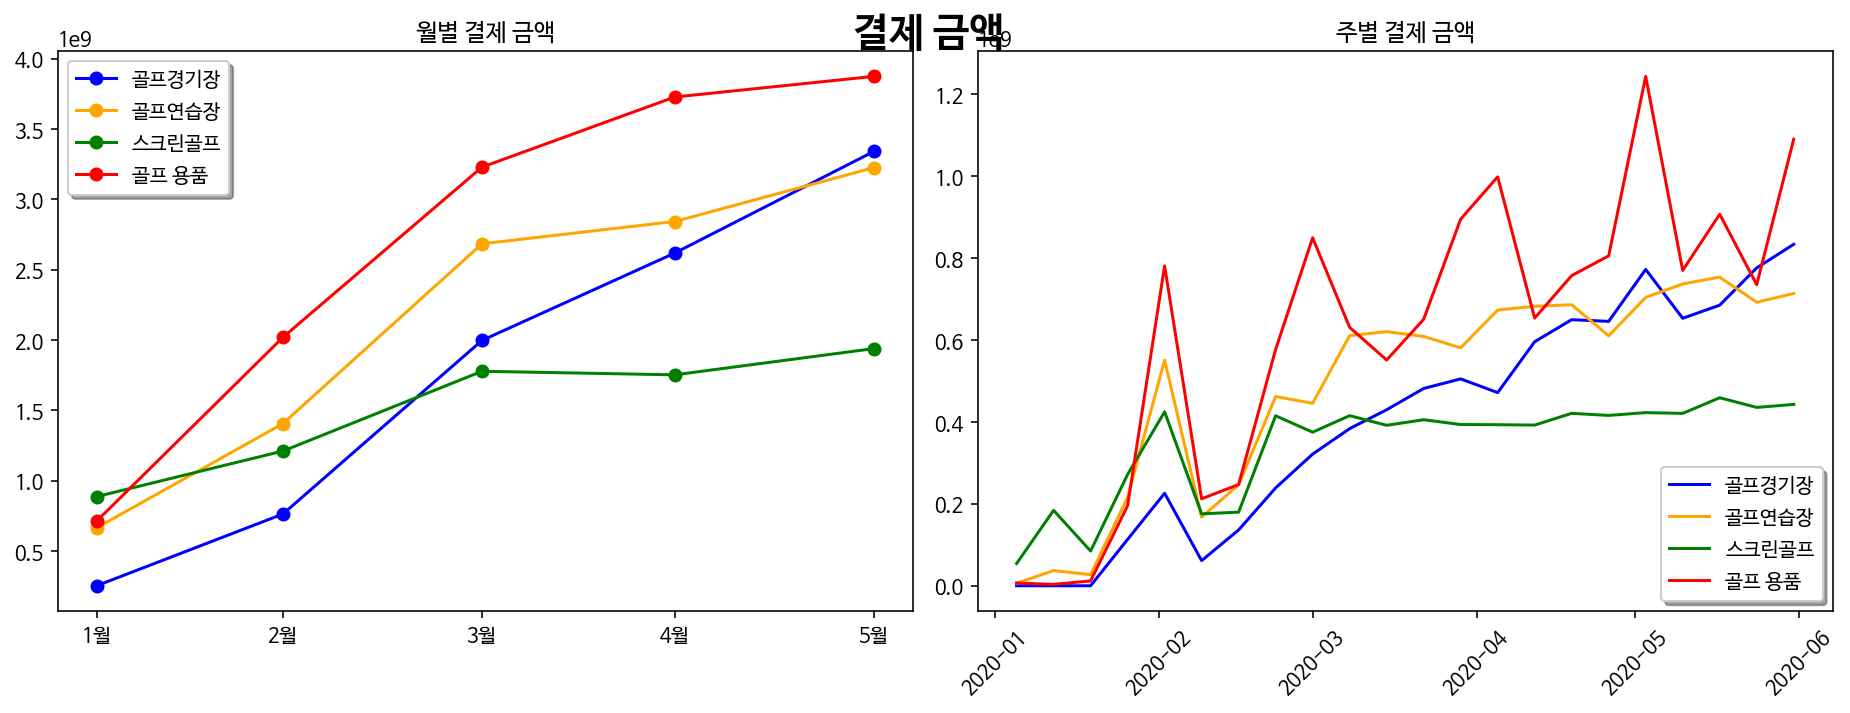

In [ ]:
# 결제 횟수
values = ["1월","2월","3월","4월","5월"]
fig = plt.figure()
fig.set_size_inches(13,5)

plt.subplot(1,2,1)
plt.plot(golf_count_month['골프경기장'], c='b', label='골프경기장', marker = "o")
plt.plot(golf_count_month['골프연습장'], c='orange',label='골프연습장', marker = "o")
plt.plot(golf_count_month['스크린골프'], c='g',label='스크린골프', marker = "o")
plt.plot(golf_count_month['골프 용품'], c='r',label='골프 용품', marker = "o")
plt.xticks(golf_count_month.index,values)
plt.legend(shadow=True, fancybox=True, loc="upper left")
plt.title('월별 결제 횟수')

plt.subplot(1,2,2)
plt.plot(golf_count_week['골프경기장'], c='b', label='골프경기장')
plt.plot(golf_count_week['골프연습장'], c='orange',label='골프연습장')
plt.plot(golf_count_week['스크린골프'], c='g',label='스크린골프')
plt.plot(golf_count_week['골프 용품'], c='r',label='골프 용품')
plt.xticks(rotation=45)
plt.legend(shadow=True, fancybox=True, loc="lower right")
plt.title('주별 결제 횟수')
           
plt.suptitle('결제 횟수',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

# 결제 금액
fig = plt.figure()
fig.set_size_inches(13,5)

plt.subplot(1,2,1)
plt.plot(golf_money_month['골프경기장'], c='b', label='골프경기장', marker = "o")
plt.plot(golf_money_month['골프연습장'], c='orange',label='골프연습장', marker = "o")
plt.plot(golf_money_month['스크린골프'], c='g',label='스크린골프', marker = "o")
plt.plot(golf_money_month['골프 용품'], c='r',label='골프 용품', marker = "o")
plt.xticks(golf_money_month.index,values)
plt.legend(shadow=True, fancybox=True, loc="upper left")
plt.title('월별 결제 금액')

plt.subplot(1,2,2)
plt.plot(golf_money_week['골프경기장'], c='b', label='골프경기장')
plt.plot(golf_money_week['골프연습장'], c='orange',label='골프연습장')
plt.plot(golf_money_week['스크린골프'], c='g',label='스크린골프')
plt.plot(golf_money_week['골프 용품'], c='r',label='골프 용품')
plt.xticks(rotation=45)
plt.legend(shadow=True, fancybox=True, loc="lower right")
plt.title('주별 결제 금액')
           
plt.suptitle('결제 금액',fontsize=20, fontweight ="bold")

plt.tight_layout()
plt.show()

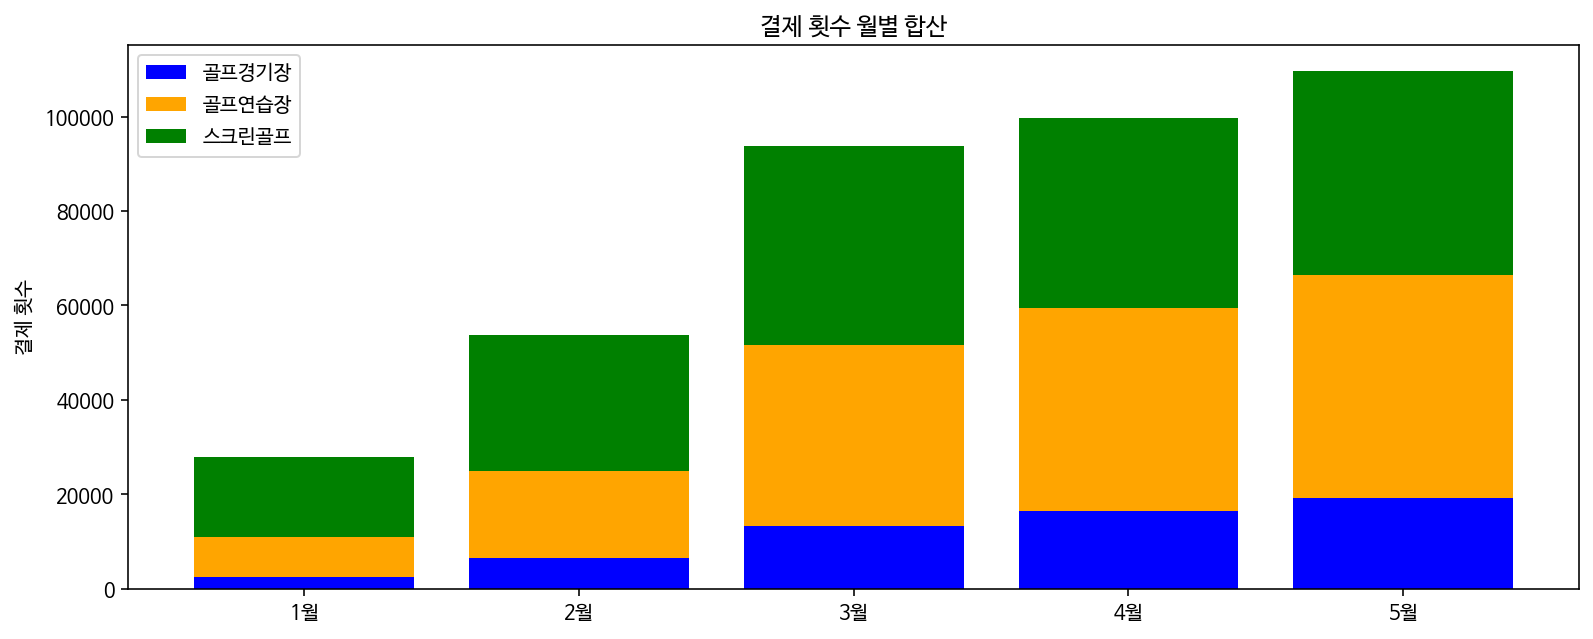

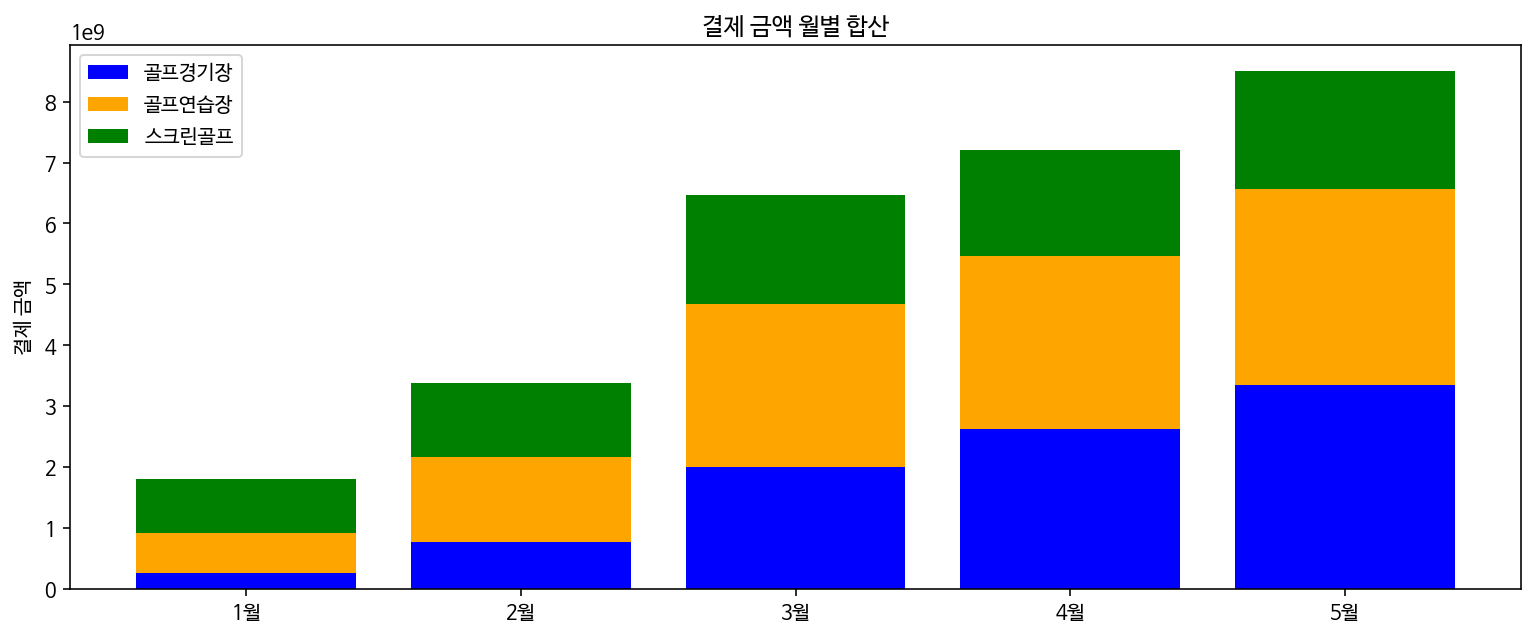

In [ ]:
data = golf_count_month.drop('골프 용품', axis=1).values
values = ["1월","2월","3월","4월","5월"]

color_list = ['b', 'orange', 'g']
data_label = ["골프경기장","골프연습장","스크린골프"]
X = np.arange(data.shape[0])

fig = plt.figure()
fig.set_size_inches(13,5)

for i in range(3):
    plt.bar(X, data[:,i], bottom = np.sum(data[:,:i], axis=1), color = color_list[i], label=data_label[i])
plt.xticks([0, 1, 2, 3, 4], values)
plt.legend()
plt.ylabel('결제 횟수')
plt.title('결제 횟수 월별 합산')
plt.show()

############
data = golf_money_month.drop('골프 용품', axis=1).values
values = ["1월","2월","3월","4월","5월"]

color_list = ['b', 'orange', 'g']
data_label = ["골프경기장","골프연습장","스크린골프"]
X = np.arange(data.shape[0])

fig = plt.figure()
fig.set_size_inches(13,5)

for i in range(3):
    plt.bar(X, data[:,i], bottom = np.sum(data[:,:i], axis=1), color = color_list[i], label=data_label[i])
plt.xticks([0, 1, 2, 3, 4], values)
plt.legend()
plt.ylabel('결제 금액')
plt.title('결제 금액 월별 합산')
plt.show()

- 코로나 이후 국내 골프산업은 전체적으로 증가한 것으로 보인다.
- 4개의 분야 모두 증가한 것을 알 수 있다.
- 골프경기장, 골프연습장, 스크린골프의 분야를 결제 금액에서 보았을 때, 1월에는 스크린골프 > 골프연습장 > 골프경기장 순으로 결제 금액이 높았으나, 5월이 되어서는 순서가 반전되어 골프경기장 > 골프연습장 > 스크린골프 순으로 결제 금액이 높아졌다.
- 해외로 나갈 수 없는 상황에서 골프경기를 하기위해 국내의 골프경기장을 찾는 사람들이 많아졌다는 것을 알 수 있다.

# 찬영님

In [ ]:
#matplotlib inline
# 1. 코로나 발생 이후, 연령별 카테고리의 cgi 평균수치의 감소가 보일것으로 추측.
# 2. 소극적인 소비행태로 인해 cgi 지수 감소도 기록될 것으로 추측.

In [ ]:
time = pd.read_csv("/content/drive/MyDrive/KT_data_20200717/COVID_19/Time.csv")
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [ ]:
index = pd.read_csv("/content/drive/MyDrive/KT_data_20200717/index.csv")
index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595


In [ ]:
# date별 코로나 확진자 수

Text(0.5, 1.0, 'Confirmed by date')

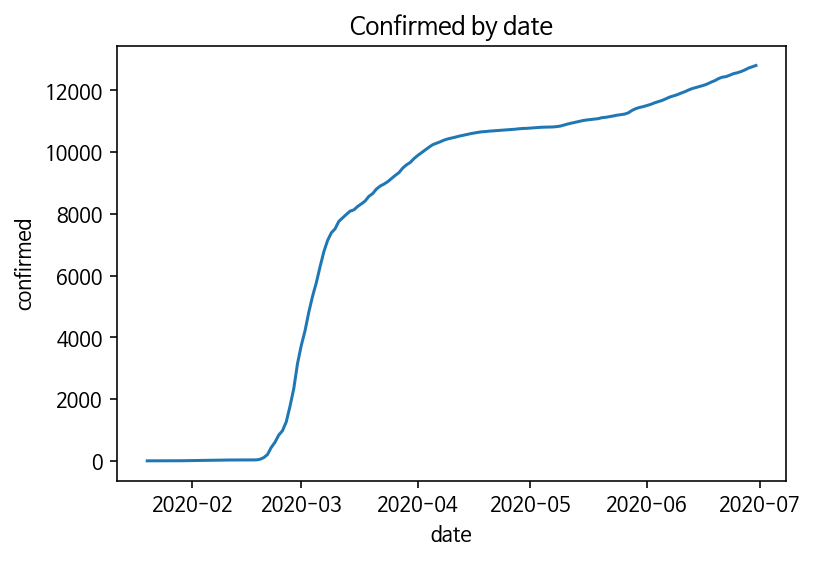

In [ ]:
time.date = pd.to_datetime(time.date)
sns.lineplot(x="date", y="confirmed", data = time)
plt.title("Confirmed by date")

2019년을 코로나 이전, 2020년을 코로나 이후로 설정함


In [ ]:
#2019년의 데이터만 뽑기 위해 마지막 달인 12월까지 몇행인지 도출
np.where(index.period == 201912)

(array([82608, 82609, 82610, ..., 90125, 90126, 90127]),)

In [ ]:
#다시, year이라는 컬럼을 추가해 년만 표시되게 하기

In [ ]:
period_list = index.period.astype(str).tolist()

In [ ]:
year_list = []
for i in period_list:
    year_list.append(i[0:4])

In [ ]:
index["year"] = year_list
index

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [ ]:
#코로나 이전(2019년) 데이터만 뽑기 위해 조건 설정

In [ ]:
last_year = index[index["year"] == '2019']
last_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019
...,...,...,...,...,...,...,...,...,...
90123,201912,화장품,화장품,all,all,서울,all,72.688013,2019
90124,201912,화장품,화장품,all,all,서울,강동구,111.745516,2019
90125,201912,화장품,화장품,all,all,서울,서대문구,24.279394,2019
90126,201912,화장품,화장품,all,all,서울,서초구,25.715134,2019


In [ ]:
#코로나 이후(2020년) 데이터

In [ ]:
now_year = index[index["year"] == '2020']
now_year

,period,catl,catm,age,gender,sido,sigungu,cgi,year
90128,202001,건강/의료용품,건강관리용품,20,F,서울,all,101.080460,2020
90129,202001,건강/의료용품,건강관리용품,20,F,서울,강동구,142.598266,2020
90130,202001,건강/의료용품,건강관리용품,20,F,서울,광진구,92.484593,2020
90131,202001,건강/의료용품,건강관리용품,20,F,서울,구로구,162.756403,2020
90132,202001,건강/의료용품,건강관리용품,20,F,서울,양천구,77.568793,2020
...,...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660,2020
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865,2020
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402,2020
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600,2020


In [ ]:
# 2019년의 연령대별 품목별 cgi의 평균값

In [ ]:
last_mean = last_year.groupby(['year', 'age', 'catl']).mean()
last_mean = last_mean.drop(columns = 'period')
last_mean

cgi
year age catl               
2019 20  건강/의료용품  129.885245
         식품       118.586497
         일용품      125.029549
         화장품      120.923962
     30  건강/의료용품   95.776843
         식품       101.027994
         일용품       99.908279
         화장품       93.591992
     40  건강/의료용품  104.186269
         식품        99.451845
         일용품       96.973864
         화장품       88.120565
     50  건강/의료용품  104.197599
         식품       101.345769
         일용품       92.956185
         화장품       86.100039
     60  건강/의료용품  113.988335
         식품       102.282403
         일용품      100.047142
         화장품       92.799079
     all 건강/의료용품  103.287897
         식품       101.287899
         일용품       95.536417
         화장품       87.280067

In [ ]:
#2020년의 연령대별 품목별 cgi의 평균값

In [ ]:
now_mean = now_year.groupby(['year', 'age', 'catl']).mean()
now_mean = now_mean.drop(columns = 'period')
now_mean

cgi
year age catl               
2020 20  건강/의료용품  125.643626
         식품       112.201102
         일용품      104.349345
         화장품       94.520504
     30  건강/의료용품   85.074590
         식품        87.849004
         일용품       70.823055
         화장품       87.529506
     40  건강/의료용품   91.254463
         식품        88.175043
         일용품       79.965584
         화장품       65.652442
     50  건강/의료용품   95.223442
         식품        91.623447
         일용품       76.642391
         화장품       70.240234
     60  건강/의료용품   93.147133
         식품        91.330089
         일용품       86.947310
         화장품       79.629638
     all 건강/의료용품   91.544952
         식품        89.828966
         일용품       78.400660
         화장품       72.365893

In [ ]:
#2019년의 연령대별 품목별 cgi평균의 시각화

In [ ]:
last_mean1 = pd.pivot_table(
    last_mean,
    index = "age",
    columns = "catl",
    values = "cgi",
    aggfunc = "mean"
)
last_mean1

catl,건강/의료용품,식품,일용품,화장품
age,,,,
20,129.885245,118.586497,125.029549,120.923962
30,95.776843,101.027994,99.908279,93.591992
40,104.186269,99.451845,96.973864,88.120565
50,104.197599,101.345769,92.956185,86.100039
60,113.988335,102.282403,100.047142,92.799079
all,103.287897,101.287899,95.536417,87.280067


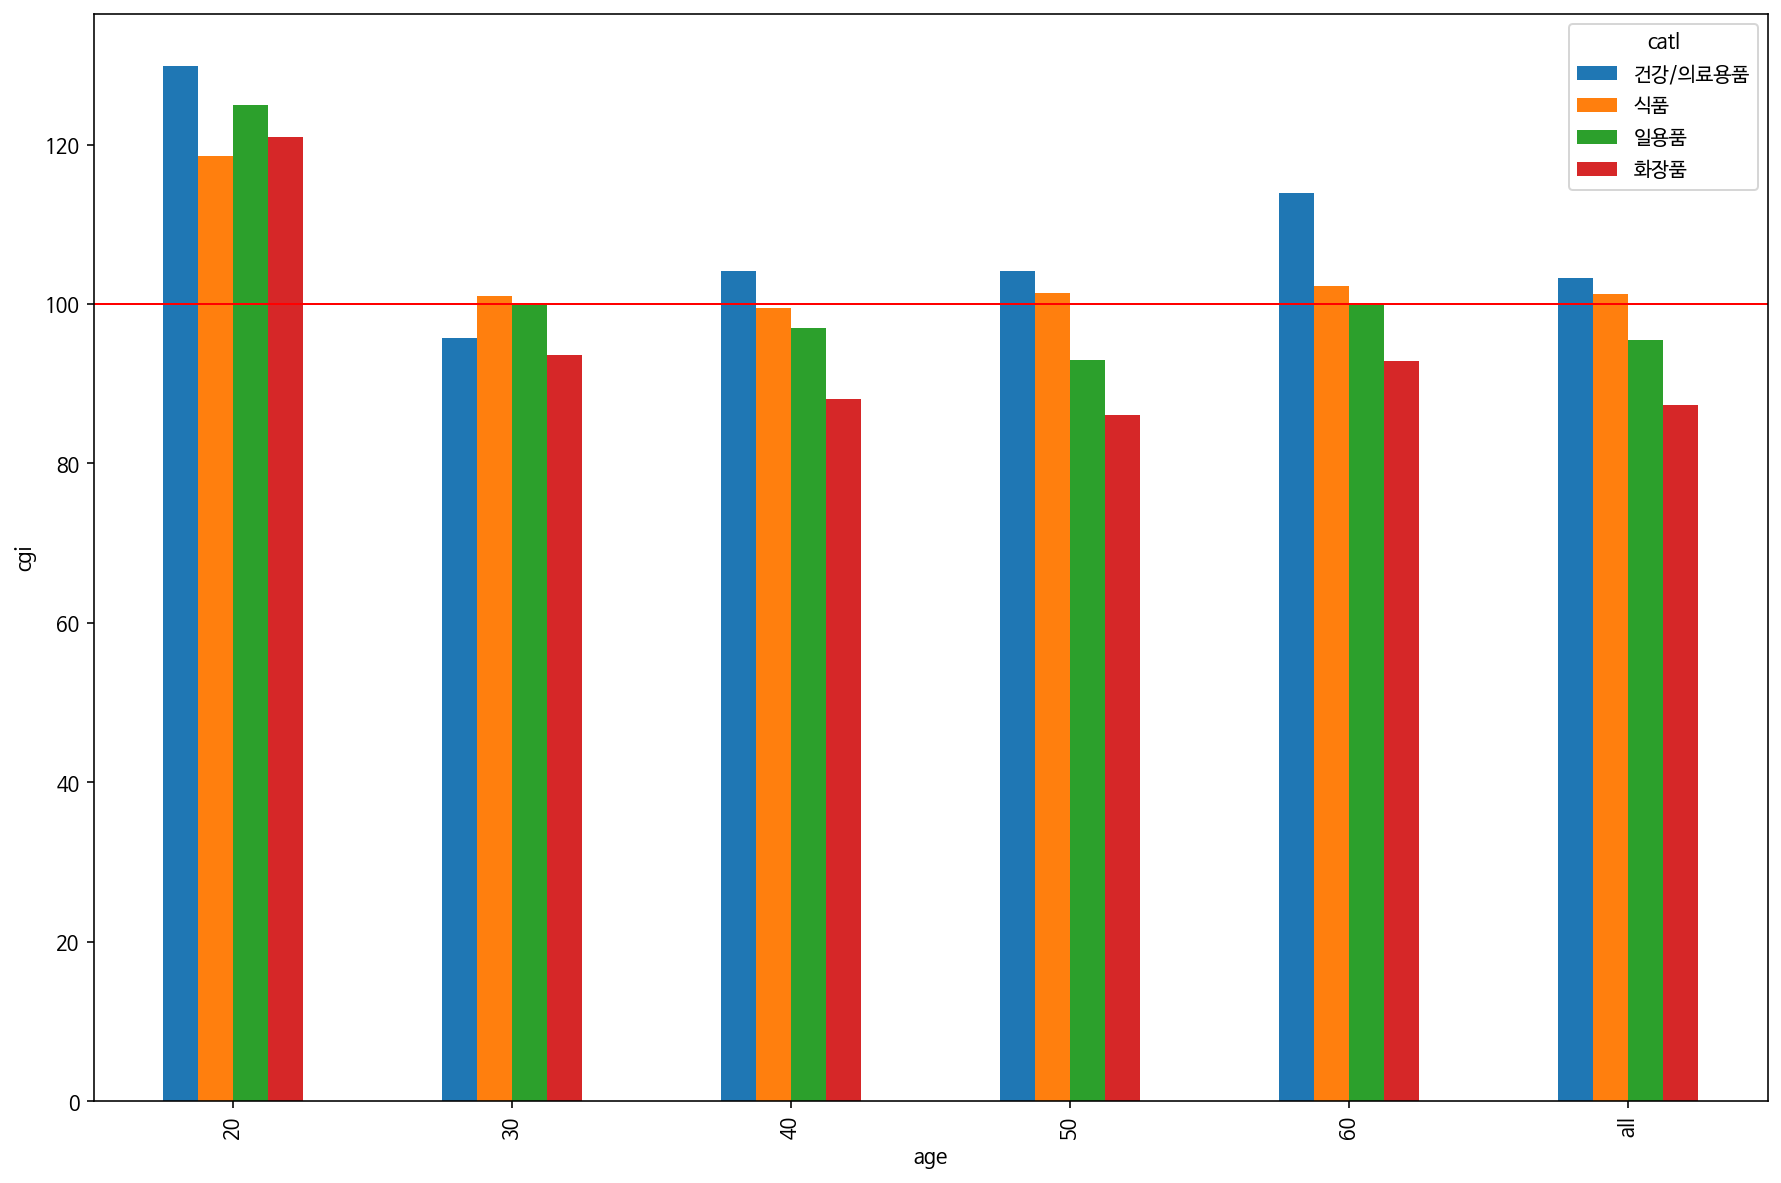

In [ ]:
ax = last_mean1.plot.bar()
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("age")
ax.set_ylabel("cgi")
plt.axhline(y=100, color='r', linewidth=1)
plt.show()

In [ ]:
#2020년의 연령대별 품목별 cgi의 시각화

In [ ]:
now_mean1 = pd.pivot_table(
    now_mean,
    index = "age",
    columns = "catl",
    values = "cgi",
    aggfunc = "mean"
)
now_mean1

catl,건강/의료용품,식품,일용품,화장품
age,,,,
20,125.643626,112.201102,104.349345,94.520504
30,85.074590,87.849004,70.823055,87.529506
40,91.254463,88.175043,79.965584,65.652442
50,95.223442,91.623447,76.642391,70.240234
60,93.147133,91.330089,86.947310,79.629638
all,91.544952,89.828966,78.400660,72.365893


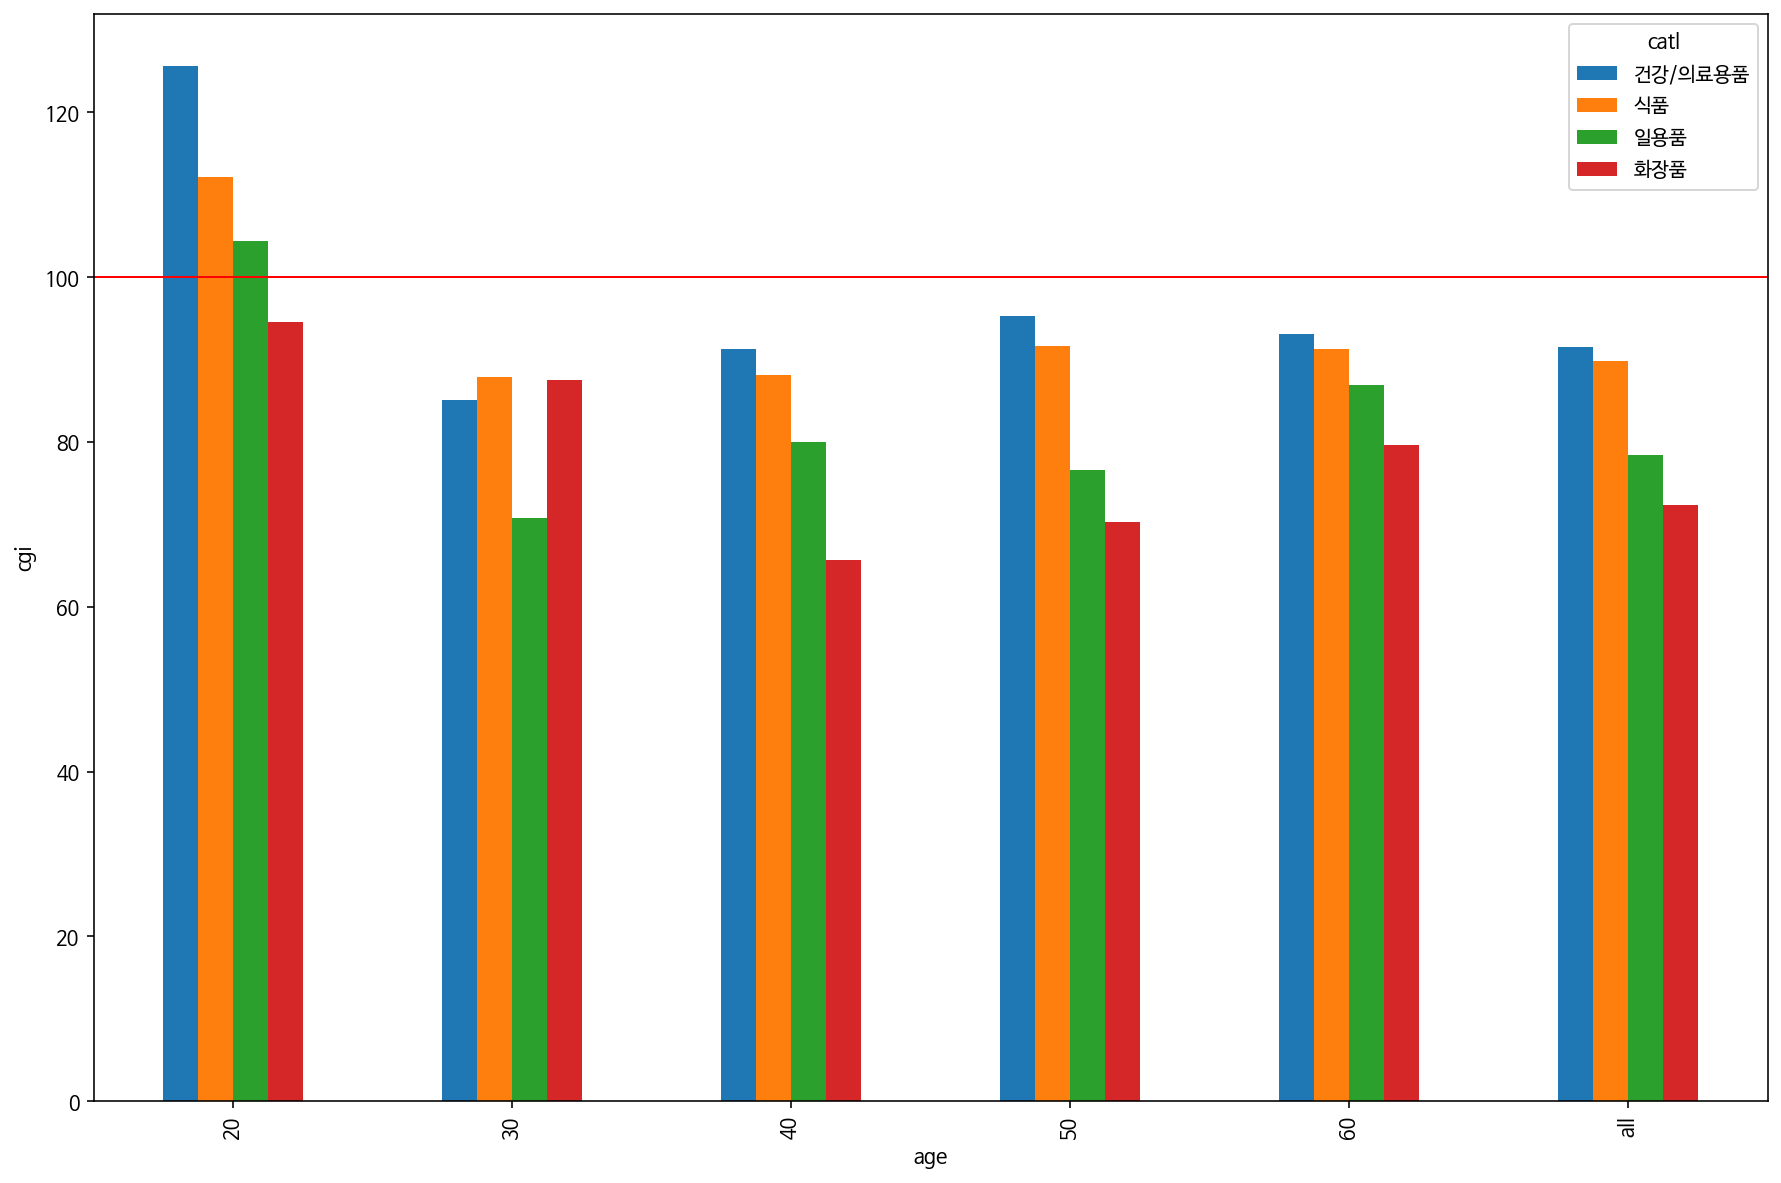

In [ ]:
ax = now_mean1.plot.bar()
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("age")
ax.set_ylabel("cgi")
plt.axhline(y=100, color='r', linewidth=1)
plt.show()

In [ ]:
#연령별로 나눠서 보기로 결정

In [ ]:
last_mean20 = last_mean1.iloc[[0],:]
now_mean20 = now_mean1.iloc[[0],:]
result20 = pd.concat([last_mean20, now_mean20])

last_mean30 = last_mean1.iloc[[1],:]
now_mean30 = now_mean1.iloc[[1],:]
result30 = pd.concat([last_mean30, now_mean30])

last_mean40 = last_mean1.iloc[[2],:]
now_mean40 = now_mean1.iloc[[2],:]
result40 = pd.concat([last_mean40, now_mean40])

last_mean50 = last_mean1.iloc[[3],:]
now_mean50 = now_mean1.iloc[[3],:]
result50 = pd.concat([last_mean50, now_mean50])

last_mean60 = last_mean1.iloc[[4],:]
now_mean60 = now_mean1.iloc[[4],:]
result60 = pd.concat([last_mean60, now_mean60])


In [ ]:
# 20대 cgi 비교

(0.0, 140.0)

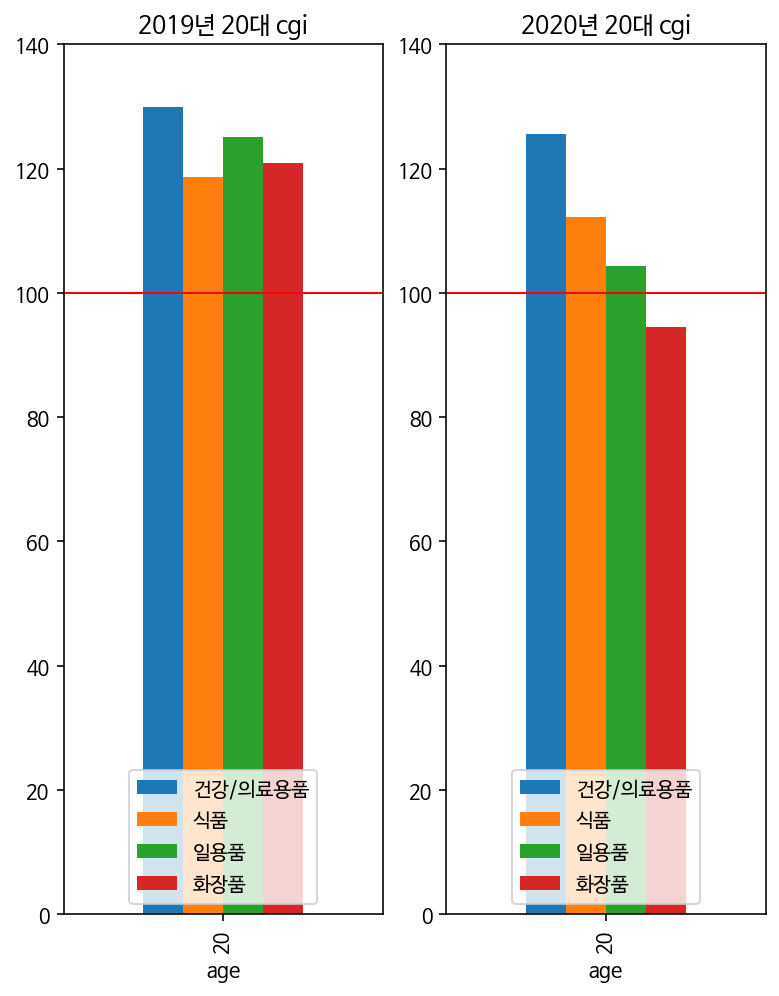

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)


axes[0].set_title("2019년 20대 cgi")
axes[1].set_title("2020년 20대 cgi")
last_mean20.plot(ax=axes[0], kind= 'bar')
now_mean20.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.1)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,140)
axes[1].set_ylim(0,140)

In [ ]:
## 화장품의 매출이 확연히 감소한 것으로 사료됨.

In [ ]:
#30대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

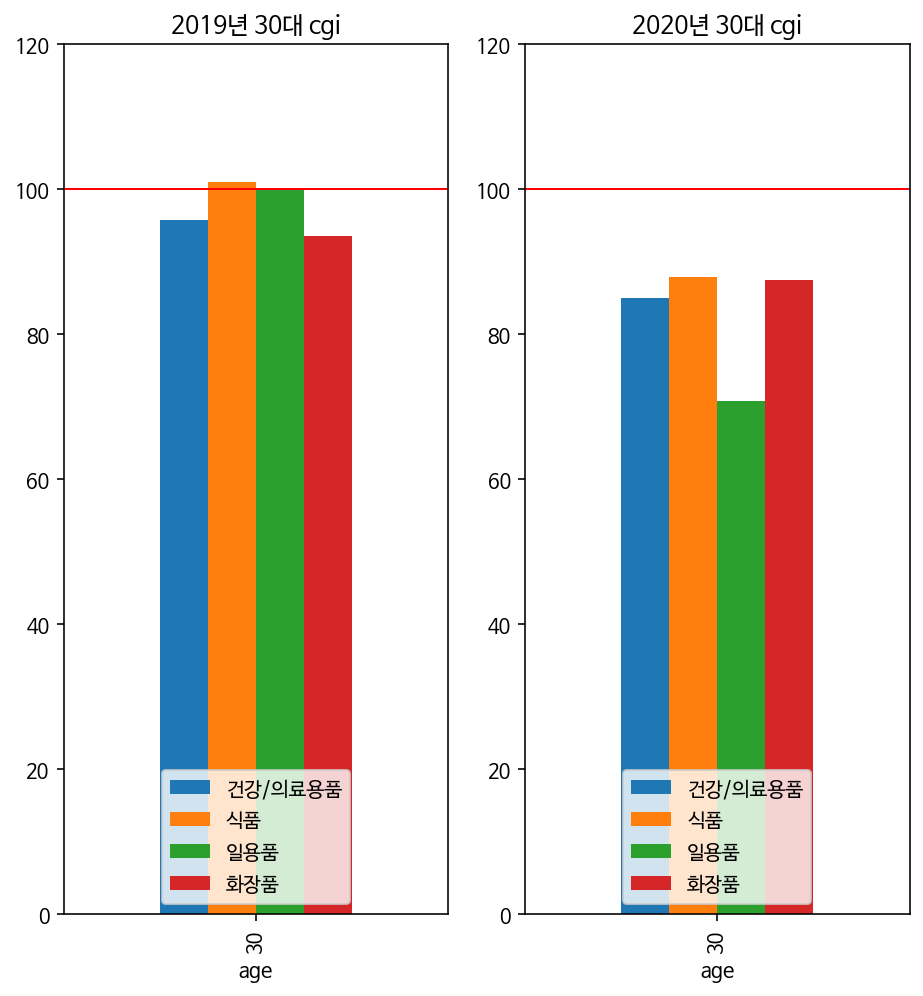

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 30대 cgi")
axes[1].set_title("2020년 30대 cgi")
axes[0].legend(loc = "lower center")
last_mean30.plot(ax=axes[0], kind= 'bar')
now_mean30.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
## 모든 품목의 매출이 일제히 줄었으며, 특히 일용품의 매출이 눈에 띄게 감소함.

In [ ]:
#40대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

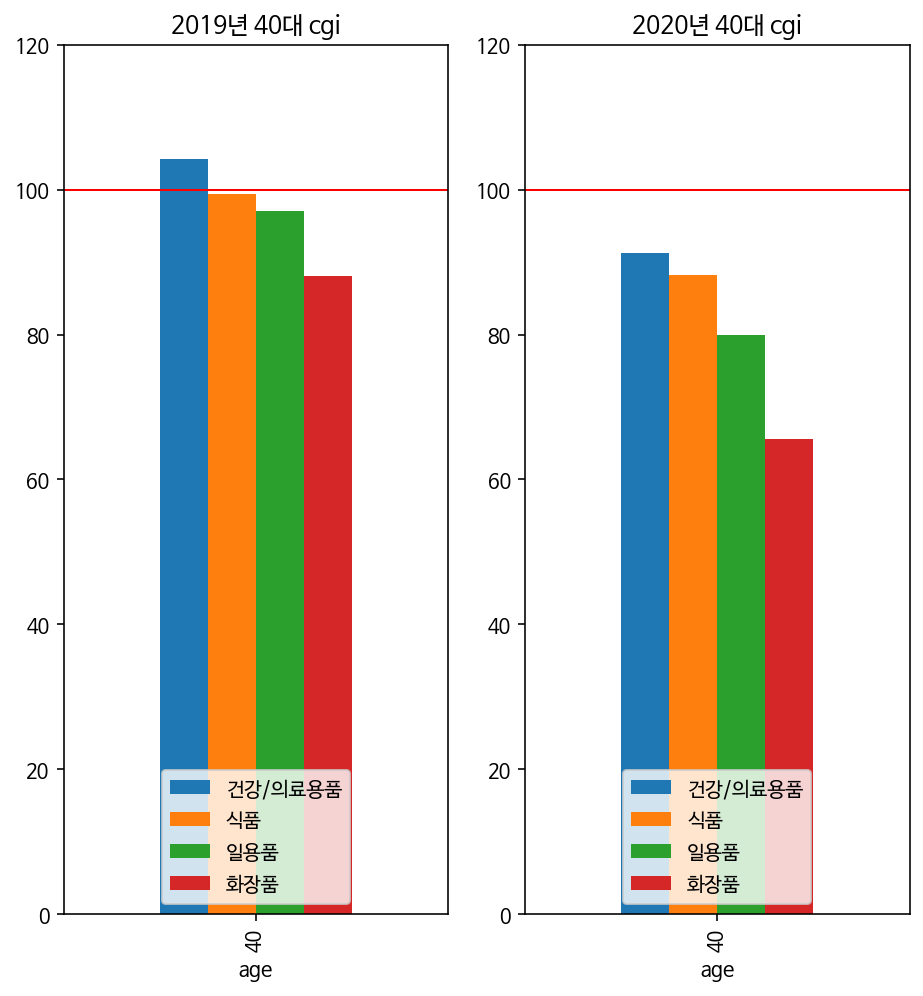

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 40대 cgi")
axes[1].set_title("2020년 40대 cgi")
axes[0].legend(loc = "lower center")
last_mean40.plot(ax=axes[0], kind= 'bar')
now_mean40.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
## 모든 품목의 매출이 하락함.

In [ ]:
#50대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

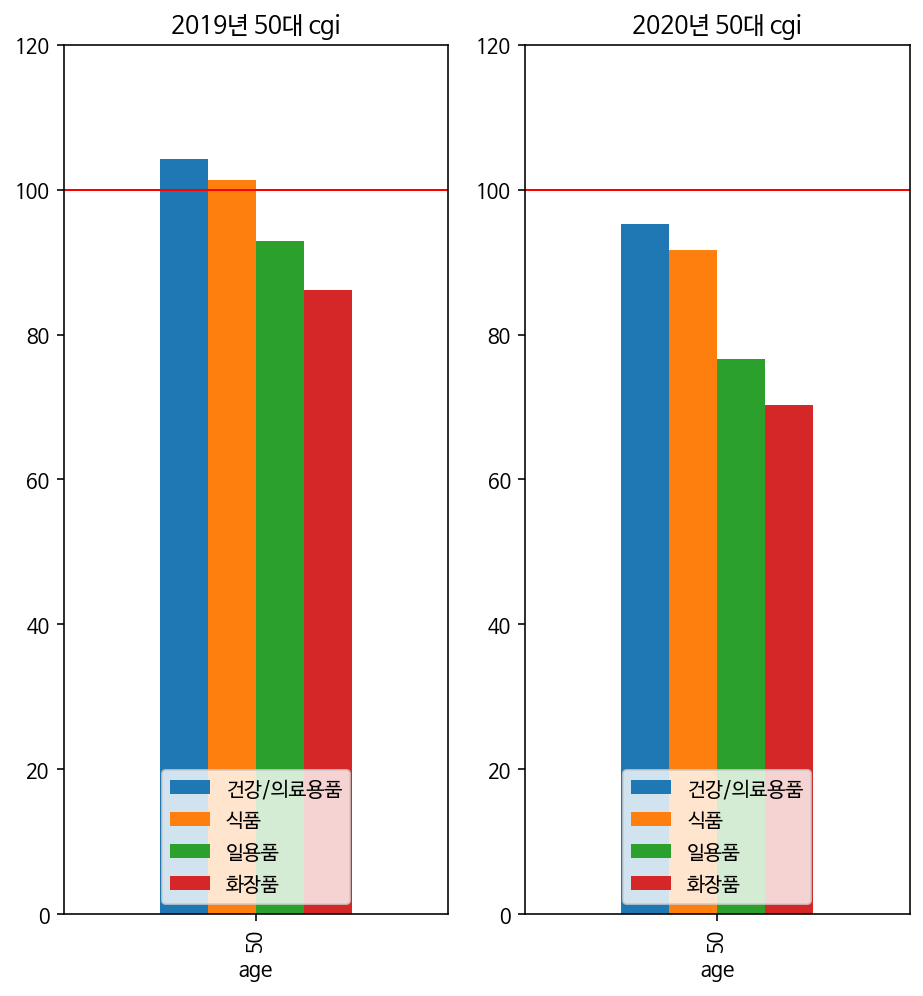

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 50대 cgi")
axes[1].set_title("2020년 50대 cgi")
axes[0].legend(loc = "lower center")
last_mean50.plot(ax=axes[0], kind= 'bar')
now_mean50.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
##모든 품목의 매출이 하락함.

In [ ]:
#60대 cgi 비교

No handles with labels found to put in legend.


(0.0, 120.0)

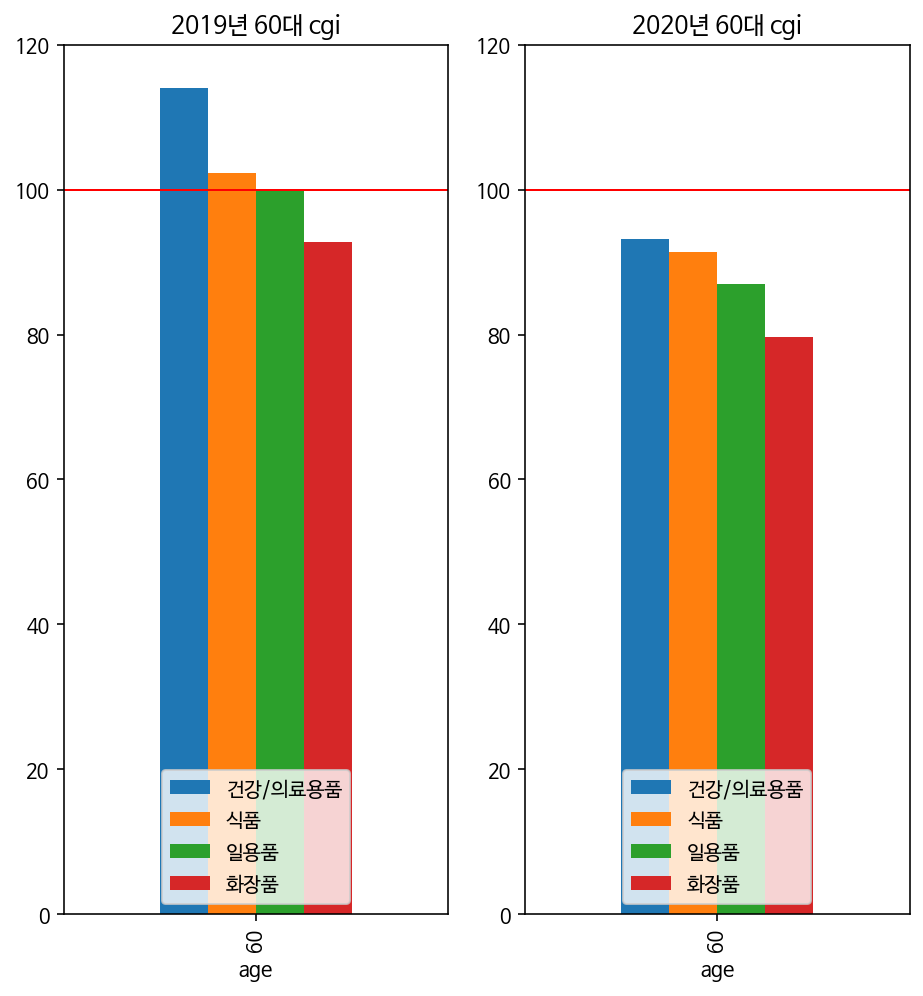

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(5,8)

axes[0].set_title("2019년 60대 cgi")
axes[1].set_title("2020년 60대 cgi")
axes[0].legend(loc = "lower center")
last_mean60.plot(ax=axes[0], kind= 'bar')
now_mean60.plot(ax=axes[1], kind= 'bar')

plt.subplots_adjust(right=1.3)
axes[0].legend(loc = "lower center")
axes[1].legend(loc = "lower center")
axes[0].axhline(y=100, color='r', linewidth=1)
axes[1].axhline(y=100, color='r', linewidth=1)
axes[0].set_ylim(0,120)
axes[1].set_ylim(0,120)

In [ ]:
## 모든 품목의 매출이 하락함.

2018년 대비 코로나 이후 cgi 지수는 일제히 감소했지만 특정 품목에 대해서 눈에띄게 감소한 점은 특징지을 수 없음.